# Data Mining / Prospecção de Dados

## Sara C. Madeira and André Falcão, 2019/20

# Project 2 - Clustering

## Logistics

**Our team consists of 2 members: João Castanheira and Gustavo Fonseca therefore our project presented in this notebook consists of the resolution of exercises:**

* Tasks **1 to 5** should be done by **all** groups
* Task **6** should be done only by **groups of 2 and 3** students

**The project's solution should be uploaded in Moodle before the end of May, 17th 2020 (23:59).** 

This project is to be **uploaded as a `.zip` file** containing all the files necessary for project evaluation. 

**Decisions here are justified and results are critically discussed.**

## 1. Load and Preprocess Dataset

Our objective while processing the data was as suggested, that was obtaining:
* a 110 rows × 5147 columns matrix, **X**, containing the values of the 5147 features for each of the 110 patients.
* a vector, **y**, with the 110 diagnosis, which we can use later to evaluate clustering quality.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df_data = pd.read_csv('AML_ALL_PATIENTS_GENES_EXTENDED.csv')
df_data.shape

(110, 5149)

In [3]:
df_data.head()

,ID,DIAGNOSIS,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,ALL,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,2,ALL,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,3,ALL,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,4,ALL,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,5,ALL,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [4]:
X = df_data.iloc[:, 2:]
y = df_data.iloc[:, 1]
X.shape, y.shape

((110, 5147), (110,))

In [5]:
X.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [6]:
y.head()

0    ALL
1    ALL
2    ALL
3    ALL
4    ALL
Name: DIAGNOSIS, dtype: object

In [7]:
y.value_counts()

ALL    70
AML    40
Name: DIAGNOSIS, dtype: int64

### Conclusion

Our objective was achieved ending up with our processed data and a ground truth to compare our results with.

## 2. Dimensionality Reduction

The number of features (genes) is extremely high when compared to the number of objects to cluster (patients). In this context, we performed dimensionality reduction, that is, we reduced the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### 2.1 Removing features with low variance

In [14]:
np.sqrt(X.shape[1])

71.74259543674177

Lets remove the features with the low variance. Low variance features are less informative about the reality they are describing.

In [29]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1.25)
X_variance = sel.fit_transform(X)
print(f"Number of rows: {X_variance.shape[0]}\nNumber of features: {X_variance.shape[1]}")

Number of rows: 110
Number of features: 31


In this case we reduced from **5147 to 31** features using a threshold of 1.25. Most of the features have a very similar variance, and we chose threshold adjusted to have less than the square root of the real number of features.

### 2.2 Removing features using PCA

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [32]:
def create_columns(num_components):
    x_axis = []
    columns = []
    for i in range(1, num_components + 1): 
        x_axis.append('PC{}'.format(i))
        columns.append('Principal Component {}'.format(i))
    return x_axis, columns

def pca(df, num_components):
    p = PCA(n_components = num_components)
    principal_components = p.fit_transform(df)
    x_axis, columns = create_columns(num_components)
    df_pca_output = pd.DataFrame({'var':p.explained_variance_ratio_, 'PC':x_axis})
    return pd.DataFrame(data = principal_components, columns = columns), df_pca_output,p

Standardize the data (mean 0 and std 1) and apply PCA

In [33]:
X_STANDARD = StandardScaler().fit(X).transform(X)
df_unsupervised_pca, df_pca, p = pca(X_STANDARD, len(X_STANDARD))

Analyse the results

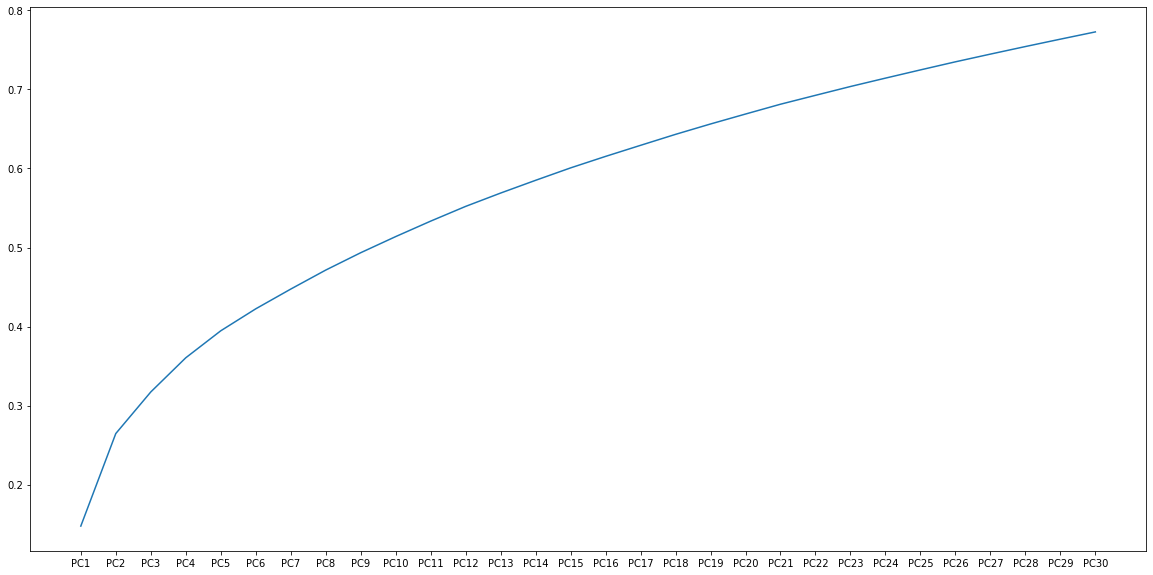

In [34]:
take = 30
plt.figure(figsize=(20,10))
plt.plot(df_pca['PC'].iloc[:take],np.cumsum(p.explained_variance_ratio_)[:take])

The figure above shows us that by retaining the first 30 components we maintain almost 80% of the data variance.

Lets save the PCA output in 'X_PCA' object, by retaining just 30 components. 

In [35]:
df_unsupervised_pca2, _ , _ = pca(X_STANDARD, 30)
X_PCA = df_unsupervised_pca2.values

### 2.3 Visualize the data using t-SNE

Now lets apply t-distributed Stochastic Neighbor Embedding (t-SNE). t-SNE is a tool to visualize high-dimensional data, and we will use it in order to reduce the dimension of our data to just 2 components, and visualize them. 

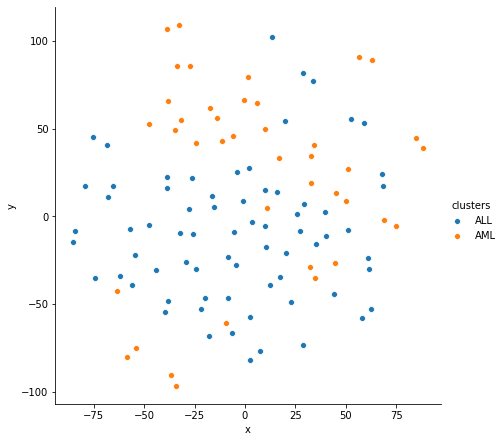

In [44]:
df_plot_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X),columns=['x','y'])
df_plot_tsne['clusters'] =y
sns.pairplot(x_vars=["x"], y_vars=["y"], data=df_plot_tsne, hue="clusters", height=6)

By looking to the data distribution in space, we can see that it will be a difficult clustering task if we would compare our clusters with the 'diagnosis' feature.

## 3. Clustering Patients using Partitional Clustering

Using **`K`-means** to cluster the patients:

* We start by cluster the original data (5147 features): **X**.
    * Using different values of `K`.
    * For each value of `K` we present the clustering by specifying how many patients ALL and AML are in each cluster.
    * We conclude by specifying which is the best value of `K` with support on the clustering results and the [Silhouette score]

* We cluster the data obtained after removing features with low variance: **X_variance**.
    * We study different values of `K` as above.

* We cluster the data obtained after applying PCA: **X_PCA**.
    * we study different values of `K` as above.

* We finish this section by comparing the results obtained in the three datasets above for the best `K`.

In [52]:
def kmeans_clustering(data, clusters_test):
    results_all = []
    indexes = []
    kmeans_output_vectors = []
    inertias = []
    for i, c in enumerate(clusters_test):
        data2 = data.copy()
        indexes.append(c)
        kmeans = KMeans(n_clusters=c, random_state=42).fit(data2)
        data2['cluster'] = kmeans.labels_
        data2['target'] = y
        inertias.append(kmeans.inertia_) 
        kmeans_output_vectors.append({'k':c, 'clusters': data2['cluster']})
        clusters_uniques = np.unique(data2['cluster'])
        results = {}
        for c2 in clusters_uniques:
            all_len = len(data2[(data2['cluster']==c2)&(data2['target']=='ALL')])
            aml_len = len(data2[(data2['cluster']==c2)&(data2['target']=='AML')])
            results[c2] = {'ALL':all_len, 'AML':aml_len}
        results_all.append(results)
    return pd.DataFrame(results_all, index = indexes), kmeans_output_vectors, inertias


def plot_clusters_by_diagnosis(data, ax, title):
    N = len(data)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')
    for i in ind:
        ax1 = ax.bar(i, data.iloc[i]['ALL'], width, color='r')
        ax2 = ax.bar(i+width, data.iloc[i]['AML'], width, color='g')
        autolabel(ax1)
        autolabel(ax2)

    ax.set_ylabel('Count')
    ax.set_xlabel('Cluster')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(ind)
    ax.set_title(title)
    ax.legend((ax1[0], ax2[0]), ('ALL','AML') )
    return ax


def plot_results(list_k, df_results, df_clusters_vectors):
    num_columns = 3
    num_rows = math.ceil((len(list_k)/num_columns))
    f, axs = plt.subplots(nrows= num_rows, ncols = num_columns,figsize=(20,20))
    if len(list_k) > num_columns: plots = np.concatenate(axs)
    else:plots = axs
    
    silh_all = []
    
    for i, k in enumerate(list_k):
        df_results_k = get_results(df_results, k)
        silh = round(silhouette_score(X, next(item for item in df_clusters_vectors if item["k"] == k)['clusters'], random_state=42),2)
        silh_all.append(silh)
        title = 'K = {}; AVG Silhouette score: {}'.format(k, silh )
        plot_clusters_by_diagnosis(df_results_k,plots[i],title)
    return silh_all
        
        
def plot_silhouettescore(list_k, silh_all, measure="K"):
    plt.figure(figsize=(12,6))
    plt.plot(list_k, silh_all, 'bx-')
    plt.xlabel(measure)
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs K Clusters")

        
def plot_results_tsne(df_tsne, kmeans_output_vectors, clusters_test):
    num_columns = 3
    num_rows = math.ceil((len(clusters_test)/num_columns))
    f, axs = plt.subplots(nrows= num_rows, ncols = num_columns,figsize=(20,20))
    if len(clusters_test) > num_columns: plots = np.concatenate(axs)
    else:plots = axs
    for i, k in enumerate(clusters_test):
        df_tsne['clusters'] = next(item for item in kmeans_output_vectors if item["k"] == k)['clusters']
        sns.scatterplot(x="x", y="y", data=df_tsne, hue="clusters",ax = plots[i], palette= sns.color_palette(n_colors=k))
        plots[i].set_title('t-SNE with K={}'.format(k))

def plot_elbow(ks,inertias):
    plt.plot(ks, inertias, 'bx-')
    plt.title('Elbow method using inertia')
    plt.xlabel('Cluster')
    plt.ylabel('Inertia')
        
def get_results(df_results, k):
    data_plot = df_results.loc[k]
    #remove nans 
    data_to_plot = []
    for d in data_plot:
        if isinstance(d, dict): data_to_plot.append(d)
    return pd.DataFrame(data_to_plot)

### 3.1 KMeans using original data (5147 features)

 We start by testing different values of K and saving results for further analysis.

In [47]:
%%time

clusters_test = [2,3,4,5,6,7,8,9,10]
df_kmeans_results, kmeans_output_vectors, inertias = kmeans_clustering(X, clusters_test)

CPU times: user 2min 34s, sys: 30.8 s, total: 3min 5s
Wall time: 16.1 s


It is interesting no note the time for running KMeans.

#### Analysis of the results

**Elbow method**

> The elbowmethod is based on the observation that increasing the number of clusters
can help to reduce the sum of within-cluster variance of each cluster. This is because
having more clusters allows one to capture finer groups of data objects that are more
similar to each other. However, the marginal effect of reducing the sum of within-cluster
variances may drop if too many clusters are formed, because splitting a cohesive cluster
into two gives only a small reduction. Consequently, a heuristic for selecting the right
number of clusters is to use the turning point in the curve of the sum of within-cluster
variances with respect to the number of clusters [1].

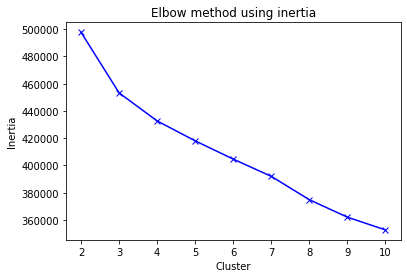

In [49]:
plot_elbow(clusters_test, inertias)

By analysing the graph above we can see that the turning point is when k= 3. So according to this analysis the best number of cluster would be three. We can see that we are obtaining very hight values of inertia, starting in 500 000 when k = 2.

Now lets plot the attribute 'DIAGNOSIS' grouped by clusters.

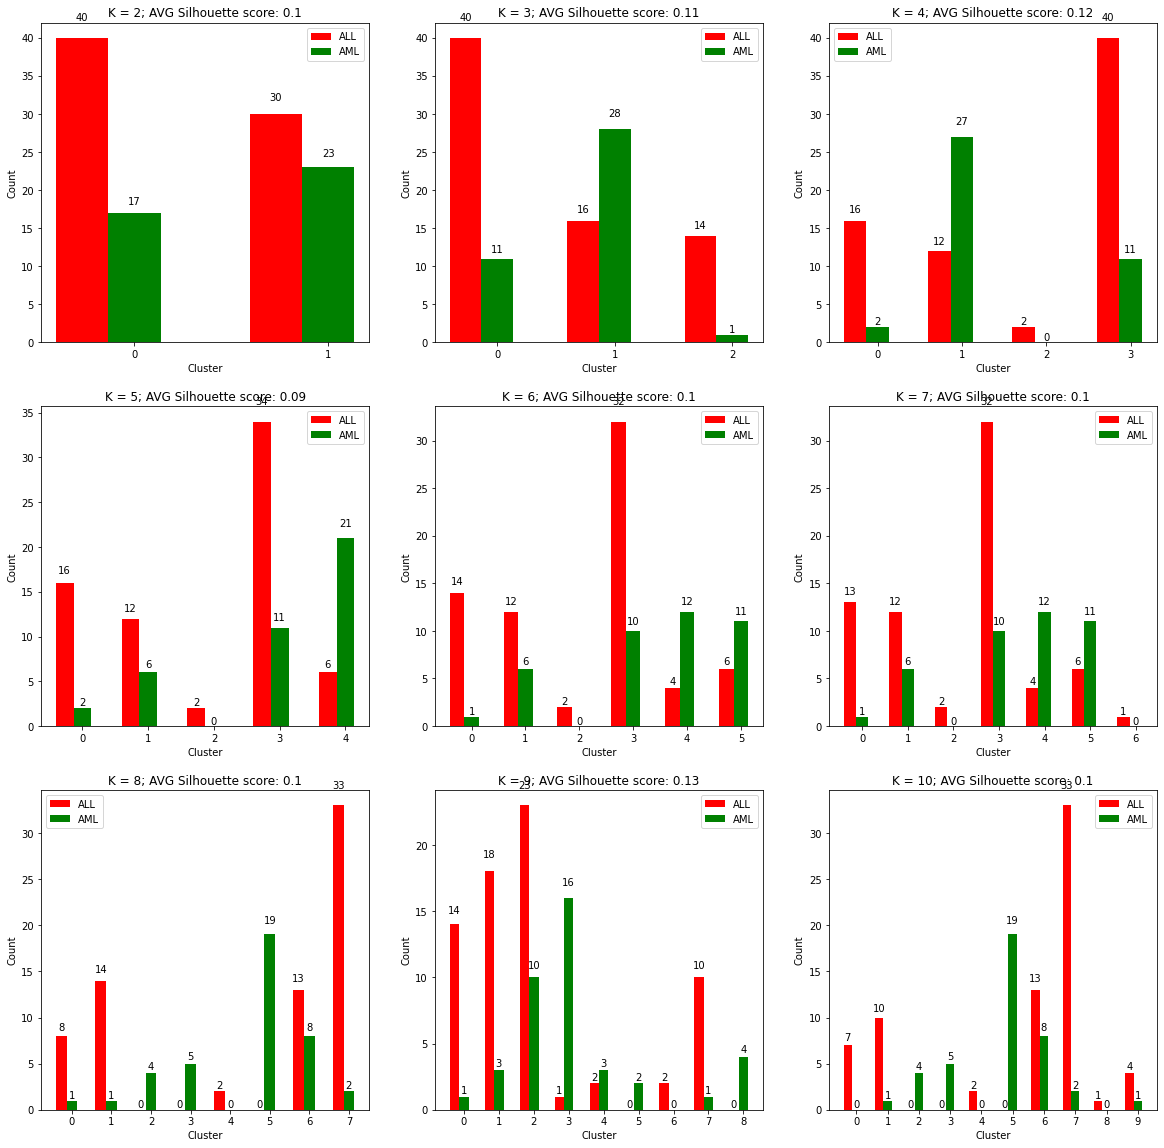

In [50]:
silh_all = plot_results(clusters_test,df_kmeans_results,kmeans_output_vectors)

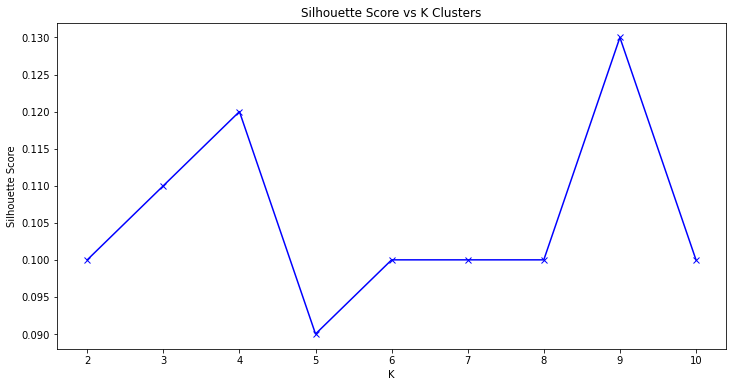

In [53]:
plot_silhouettescore(clusters_test, silh_all)

We can see in the graph above that by applying KMeans to the original data, with k = 2 the results are far from the ideal results, which would be that in each clusters we got just data for one type of diagnosis (ALL or AML). In none of the KMeans results we get closed results in the diagnosis column.

By visualizing the ground truth, however, we can observe that a few of the clusters starting with K=3 have a high percentage of one specific type of patient, which can indicate some similarity between the features within that cluster that could lead us to classify a patient as ALL or AML. 

Now lets apply t-SNE in order to visualize the clusters formed by KMeans.

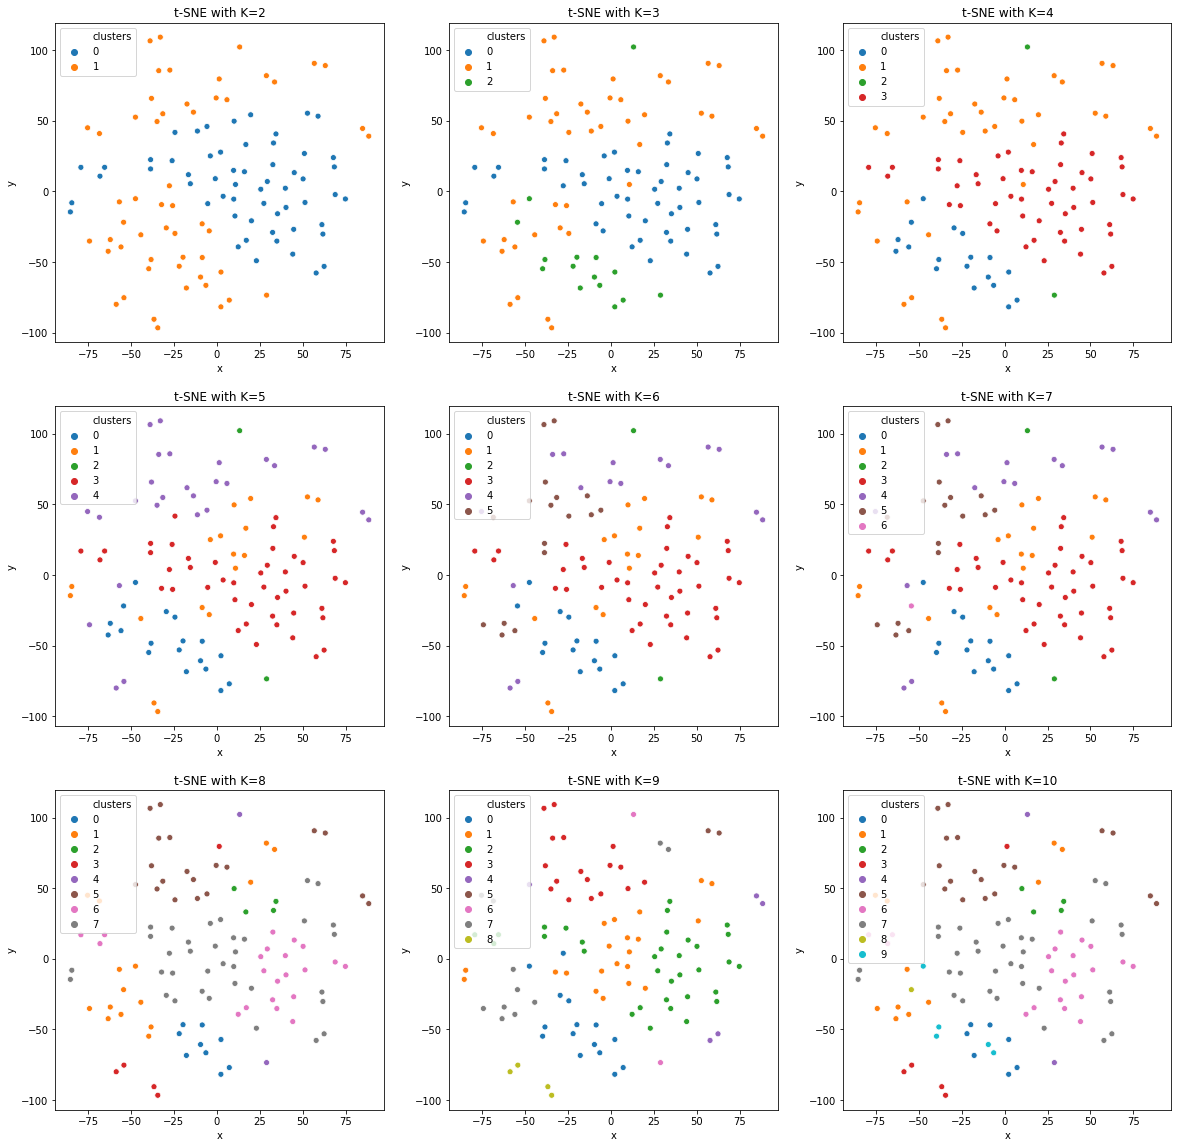

In [54]:
plot_results_tsne(df_plot_tsne,kmeans_output_vectors,clusters_test)

We tested 9 values of K, and for all of them we get average silhouette scores close to zero. This means that clusters are overlapping each other. This can be confirmed when we apply t-NSE visualization and we see that our 110 data points are very closed to each others. 

Probably we will get better results by applying dimensional reduction techniques to our data. This will be done in the next section.

### 3.2 KMeans using only high variance features

In section 2.1 we used a threshold of 1.25 in the 'VarianceThreshold' sklearn class. With that we obtained 31 features, which are the 31 features with the highest variance.

In [55]:
print(f"Number of rows: {X_variance.shape[0]}\nNumber of features: {X_variance.shape[1]}")

Number of rows: 110
Number of features: 31


Now lets apply KMeans to this data, and test the same k values that we tested in the previuos section

In [57]:
%%time

clusters_test = [2,3,4,5,6,7,8,9,10]
df_kmeans_var_results , kmeans_var_output_vectors, inertias_hv = kmeans_clustering(pd.DataFrame(X_variance), clusters_test)

CPU times: user 8.57 s, sys: 44.7 ms, total: 8.61 s
Wall time: 778 ms


We obviously take much less time if we use less features.

Now lets apply the Elbow method.

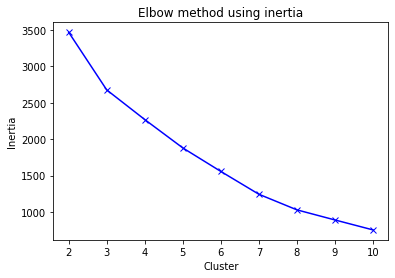

In [58]:
plot_elbow(clusters_test, inertias_hv)

The turning point is when k = 3.  We are getting much lower values of inertia using high variance features, compared to using all the features.

Now lets plot the KMeans clusters, grouped by diagnosis.

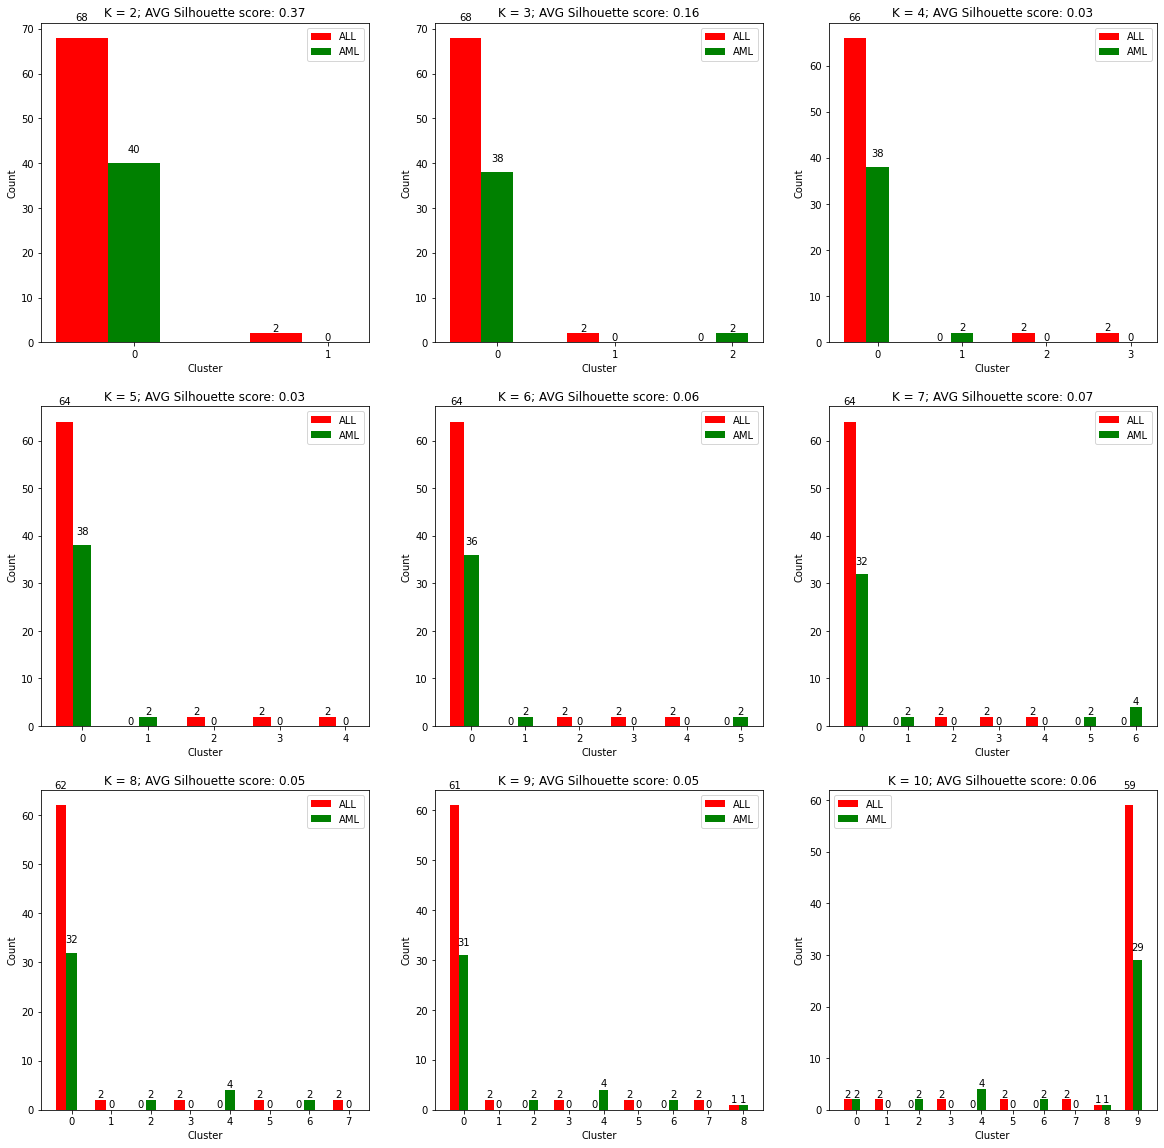

In [59]:
silh_all = plot_results(clusters_test,df_kmeans_var_results,kmeans_var_output_vectors)

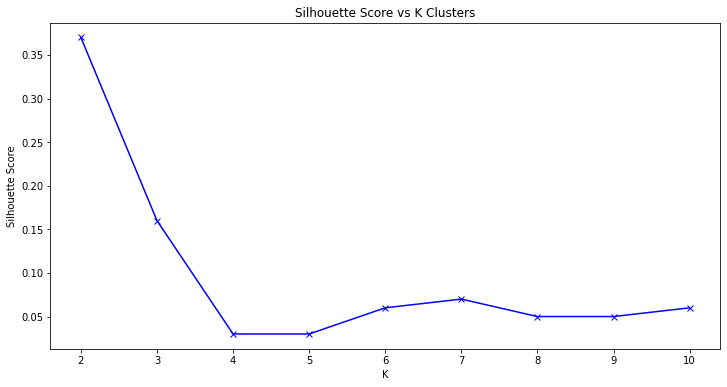

In [60]:
plot_silhouettescore(clusters_test, silh_all)

We get very strange results, by reducing the features by the variance threshold. For all K values tested we got a bigger cluster with mostly all the data, and smaller clusters with very few data points.

Otherwise, with this dimensional reduction technique we got the 0.37 silhouette score when K = 2, which is the highest we got until now.

Now lets plot the KMeans results using t-SNE visualization methods.

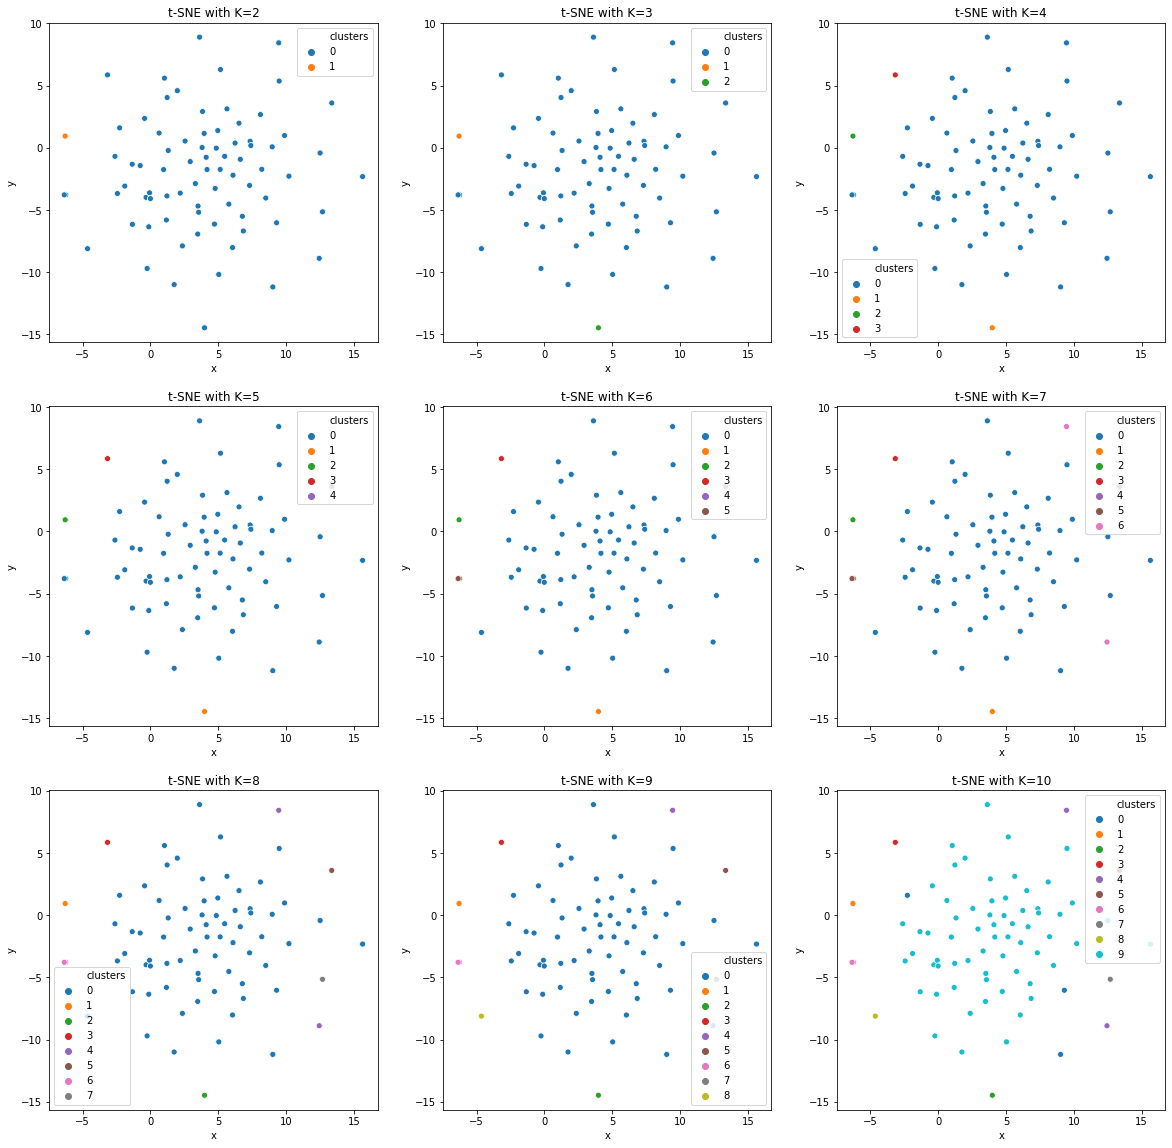

In [61]:
df_plot_var_xvar_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X_variance),columns=['x','y'])
plot_results_tsne(df_plot_var_xvar_tsne,kmeans_var_output_vectors,clusters_test)

By analysing the graphs above we can observe that almost all points are kept in just one cluster. We are not getting quality results when using this dimensional reduction technique.

### 3.3 KMeans using PCA Components

In section 2.2 we choose to retain 30 components. Lets test the KMeans clustering algorithm, with different values of K, in this data.

In [62]:
clusters_test = [2,3,4,5,6,7,8,9,10]
df_kmeans_pca_results , kmeans_pca_output_vectors, inertias_pca = kmeans_clustering(pd.DataFrame(X_PCA), clusters_test)

Apply Elbow method

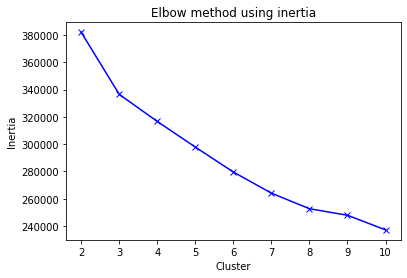

In [63]:
plot_elbow(clusters_test, inertias_pca)

Plot the results by diagnosis.

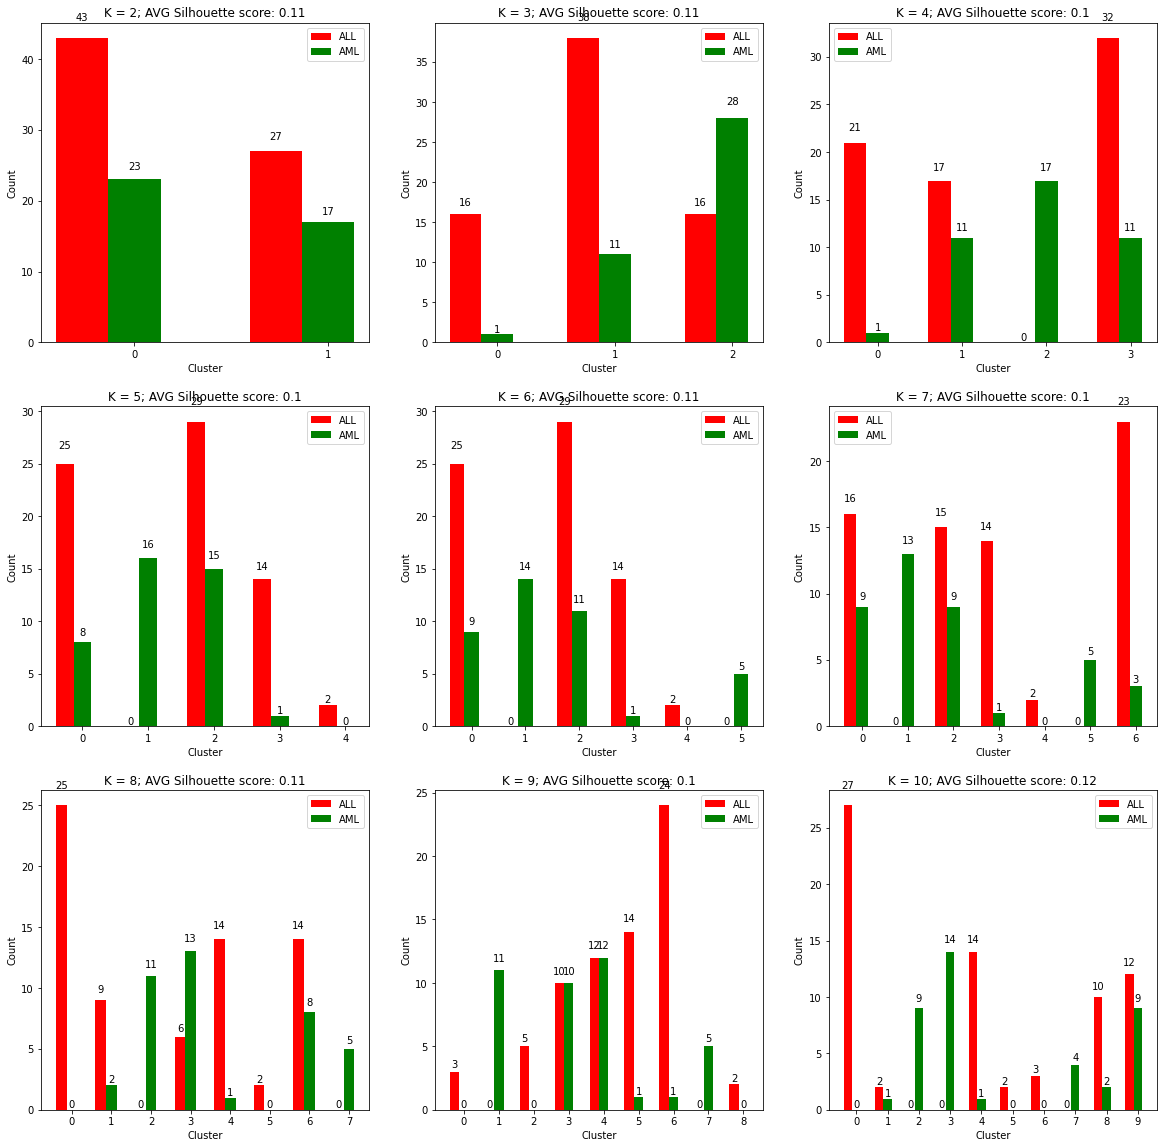

In [64]:
silh_all = plot_results(clusters_test,df_kmeans_pca_results,kmeans_pca_output_vectors)

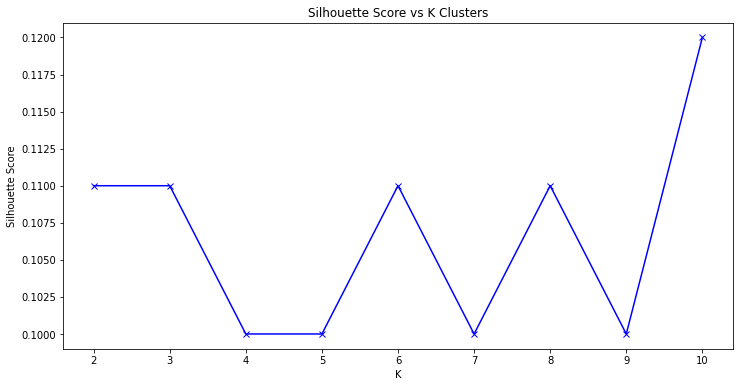

In [65]:
plot_silhouettescore(clusters_test, silh_all)

None of the K values we tested grouped the data in a similar way of the diagnosis feature. By applying KMeans after PCA we got small values of the silhouette score, with the highest obtained around 0.12 when k = 3.

We have again, however, a few interesting clusters with 100% belonging to a specific group (AML, or ALL). These clusters could be further analysed to see if there are any conclusions we could take from them.

Now lets visualize the clusters formed using t-SNE.

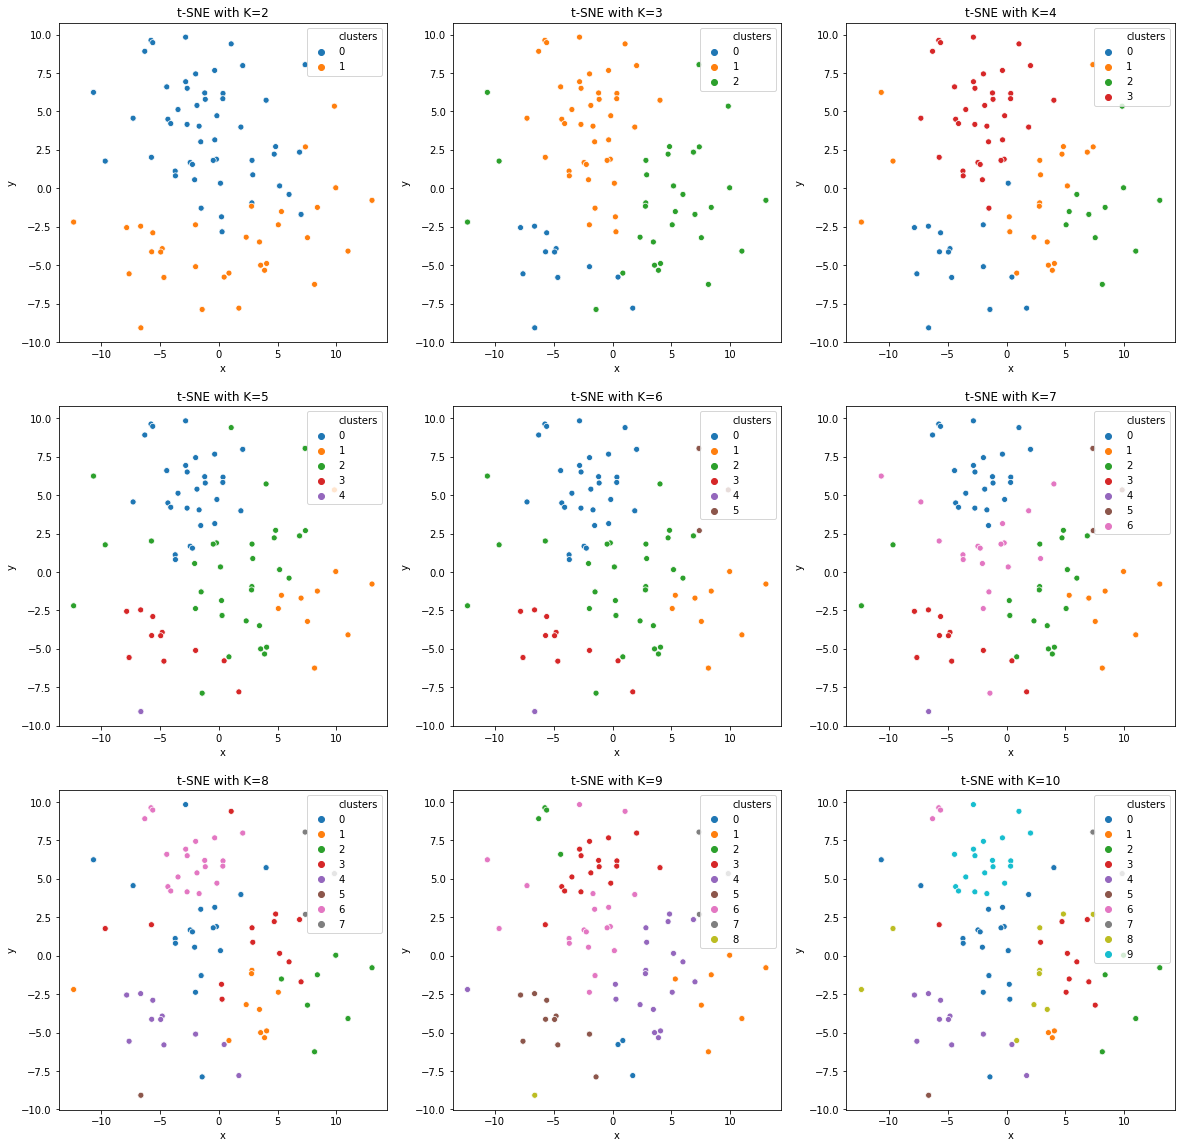

In [66]:
df_plot_pca_xpca_tsne = pd.DataFrame(TSNE(n_components=2).fit_transform(X_PCA),columns=['x','y'])
plot_results_tsne(df_plot_pca_xpca_tsne,kmeans_pca_output_vectors,clusters_test)

Despite the clusters formed are far from the diagnosis, we can see that we obtained more quality clusters when using PCA compared to the strategie of removing low variance features, because we are not obtaining one big cluster with almost all the data points.

### 3.4 Conclusions from Clustering with KMeans

None of the results we had are satisfying, especially when compared with the ground truth. There are a few clusters that we could further analyse but overall they are contantly overlapping.

The best result we had concerning Silhouette score was with KMeans applied to high variance data with a K=2 (0.37); but the results show that this was due one of the clusters being very small which for our case is far **from what we expect to achieve**. 

## 4. Clustering Patients using Hierarchical Clustering

In this section we use a **Hierarchical Clustering Algorithm (HCA)** to cluster the patients: 

* We start by clustering the data with **X_variance**.
    * We test with **different linkage metrics**.
    * We test different values of `K`.
    * For each linkage metric and value of `K` we also present the clustering by specifying how many patients ALL and AML are in each cluster. 
    * We conclude by specifying which is the best linkage metric and the best value of `K`.

* We cluster the data using **X_PCA**.
    * Same as above.

* We conclude by comparing the results obtained in the two datasets above for the best linkage metric and the best `K`.

In [68]:
def hca_clustering(data, clusters_test, linkage):
    results_all = []
    indexes = []
    hca_output_vectors = []
    for i, c in enumerate(clusters_test):
        data2 = data.copy()
        indexes.append(c)
        kmeans = AgglomerativeClustering(n_clusters=c, linkage = linkage).fit(data2)
        data2['cluster'] = kmeans.labels_
        data2['target'] = y
        hca_output_vectors.append({'k':c, 'clusters': data2['cluster']})
        clusters_uniques = np.unique(data2['cluster'])
        results = {}
        for c2 in clusters_uniques:
            all_len = len(data2[(data2['cluster']==c2)&(data2['target']=='ALL')])
            aml_len = len(data2[(data2['cluster']==c2)&(data2['target']=='AML')])
            results[c2] = {'ALL':all_len, 'AML':aml_len}
        results_all.append(results)
    return pd.DataFrame(results_all, index = indexes), hca_output_vectors


### 4.1 HCA using X_variance

We start by running different linkage metrics with different amount of clusters to visualize the best results.

Starting analysis with linkage "ward":




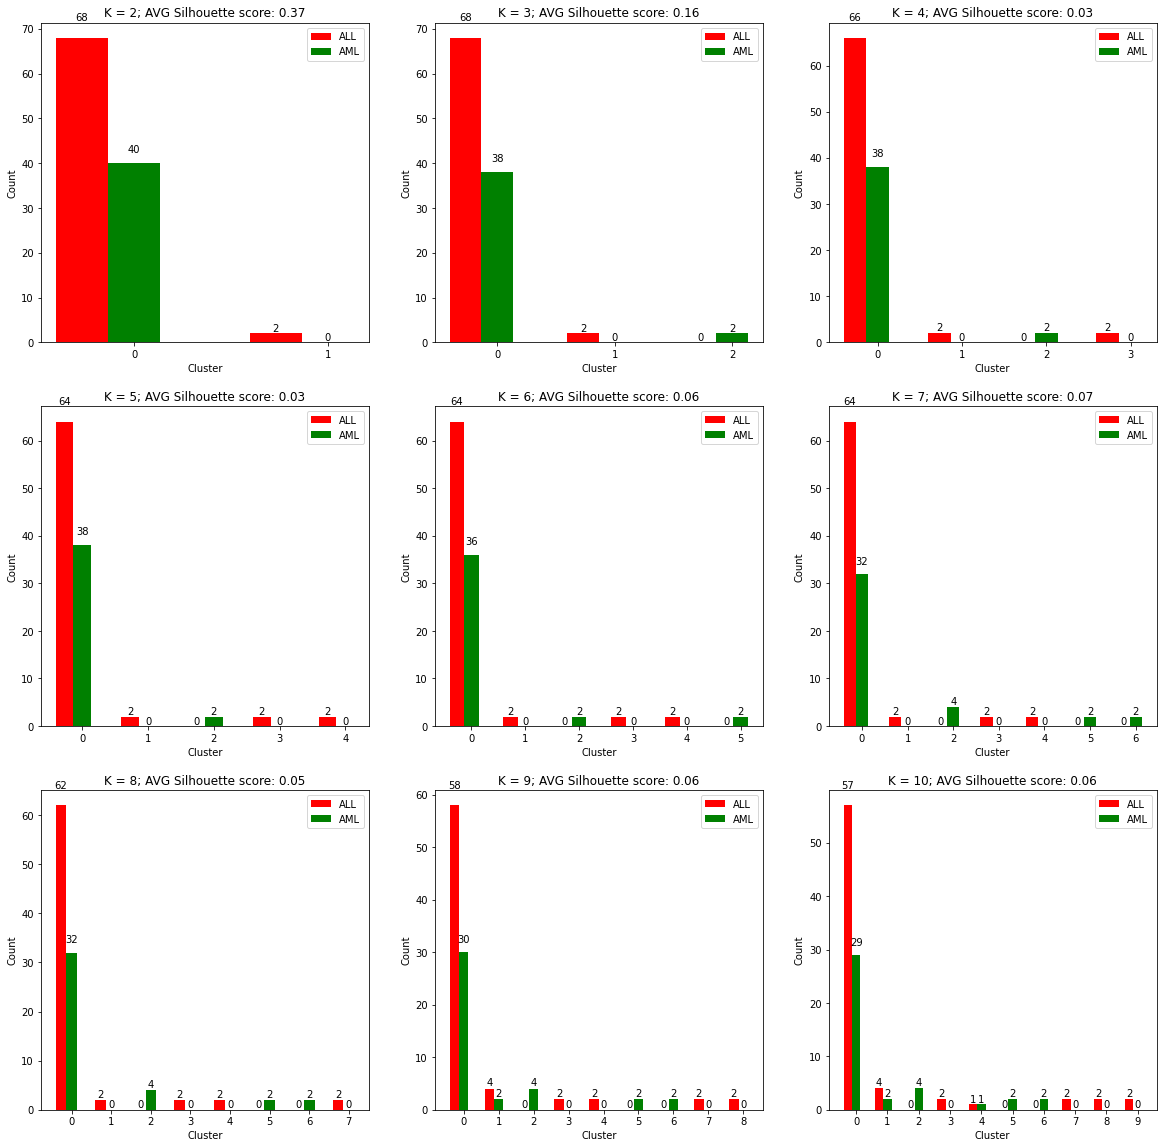

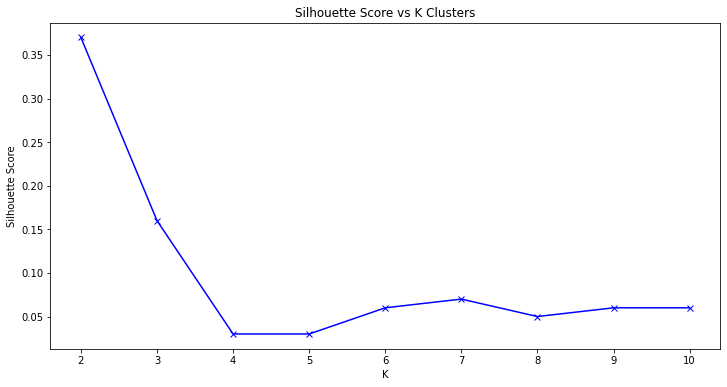

Starting analysis with linkage "complete":




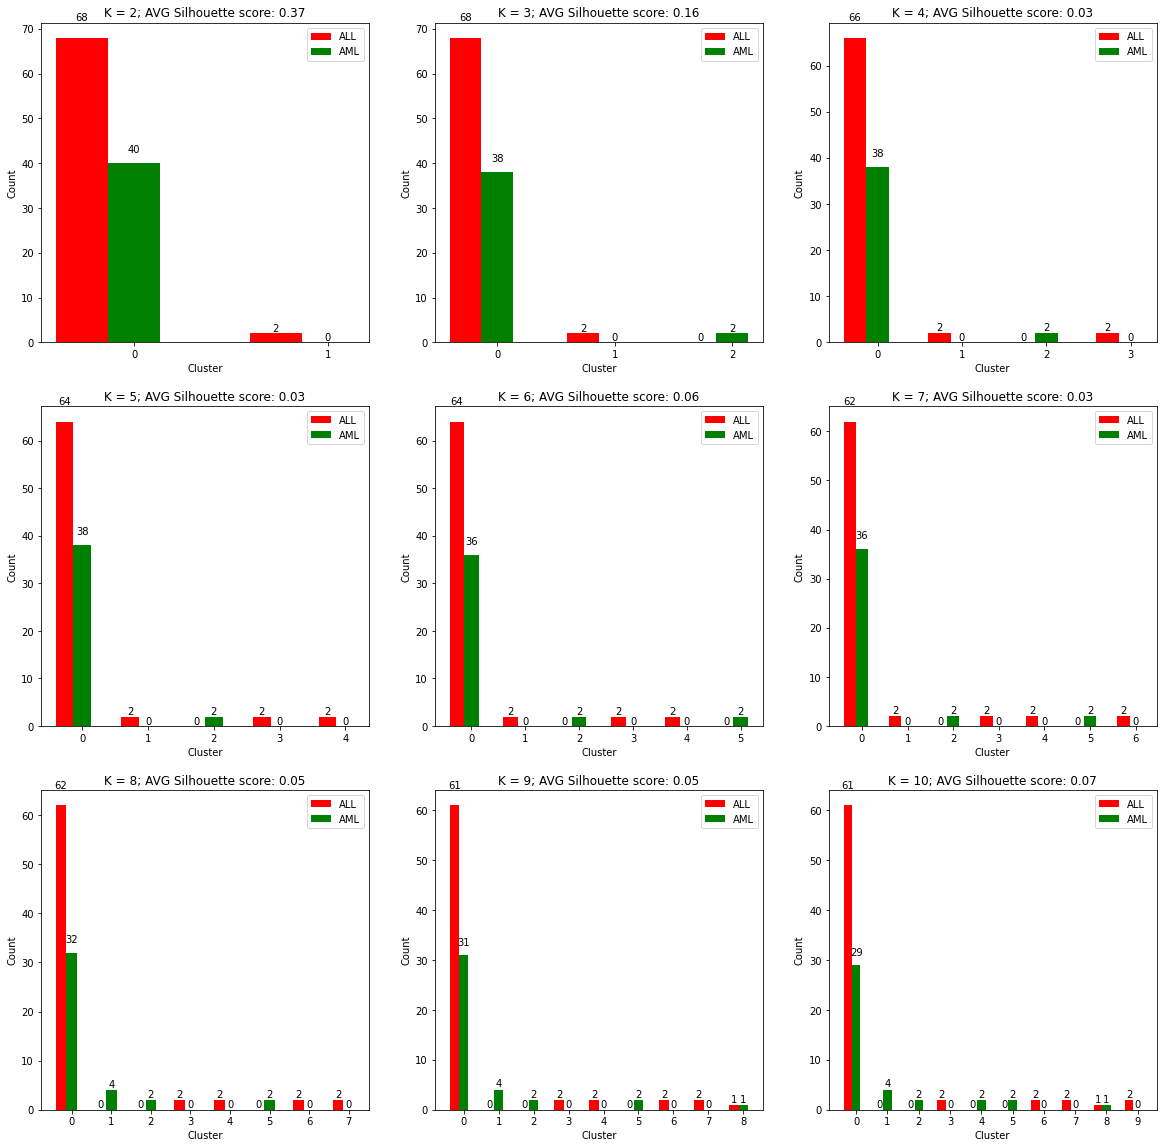

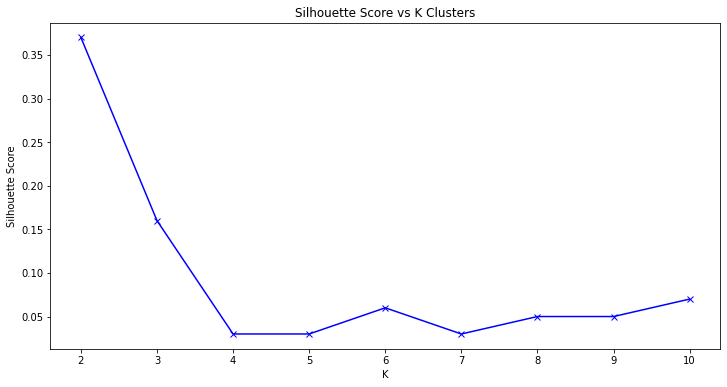

Starting analysis with linkage "average":




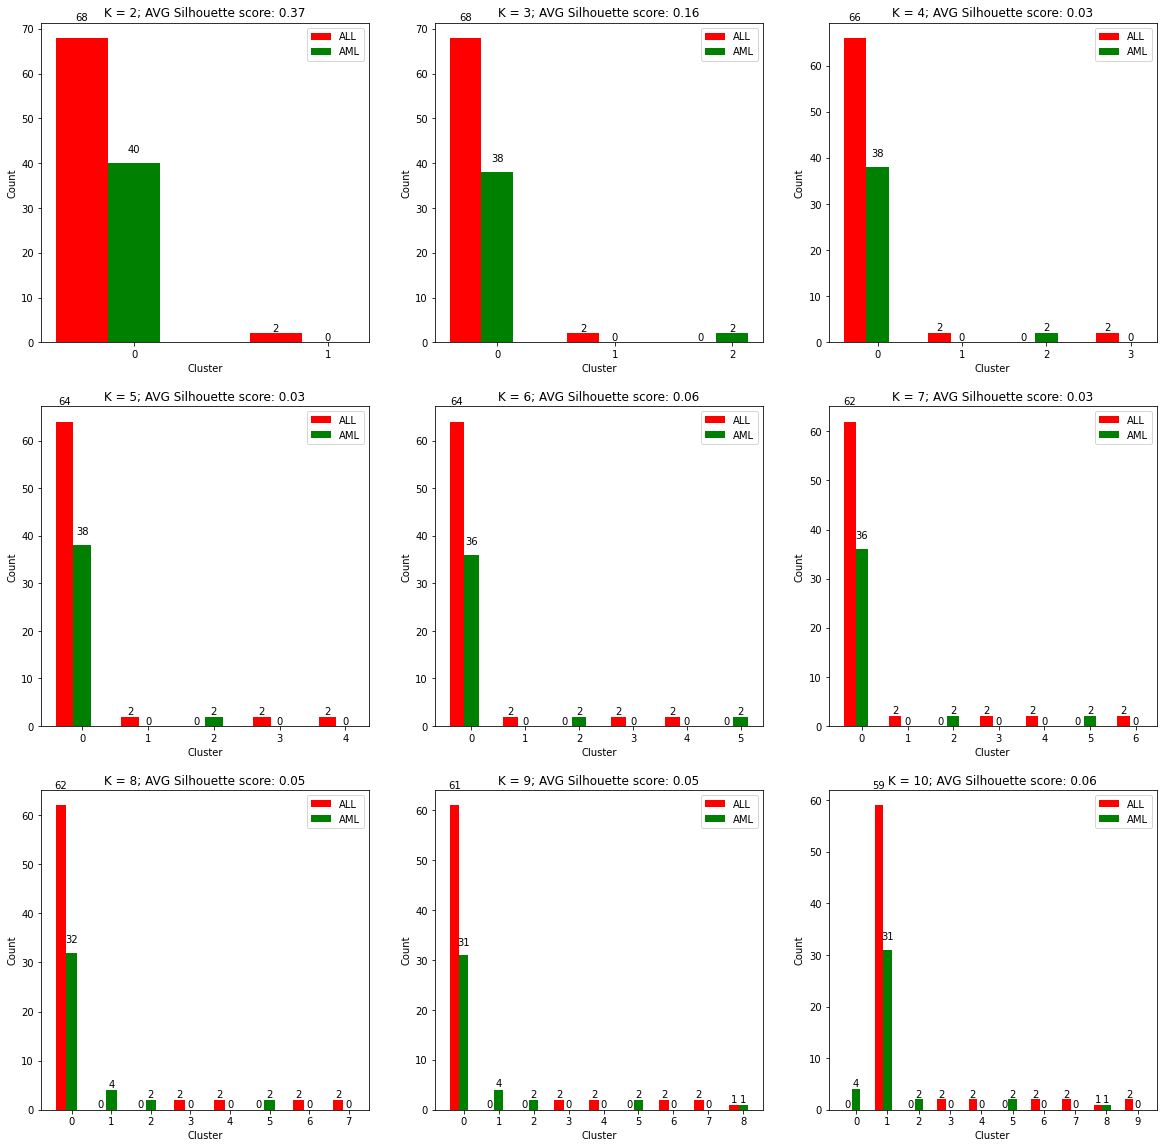

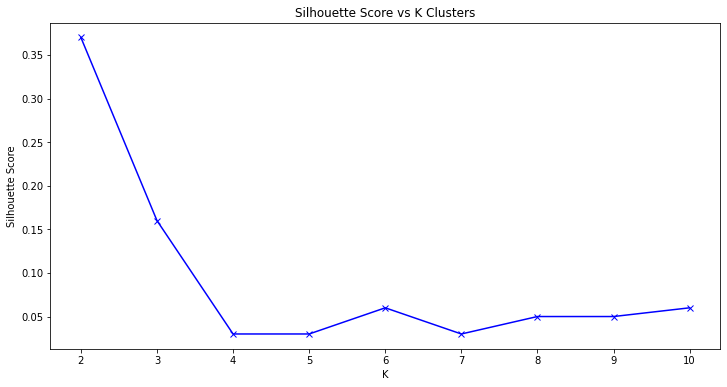

Starting analysis with linkage "single":




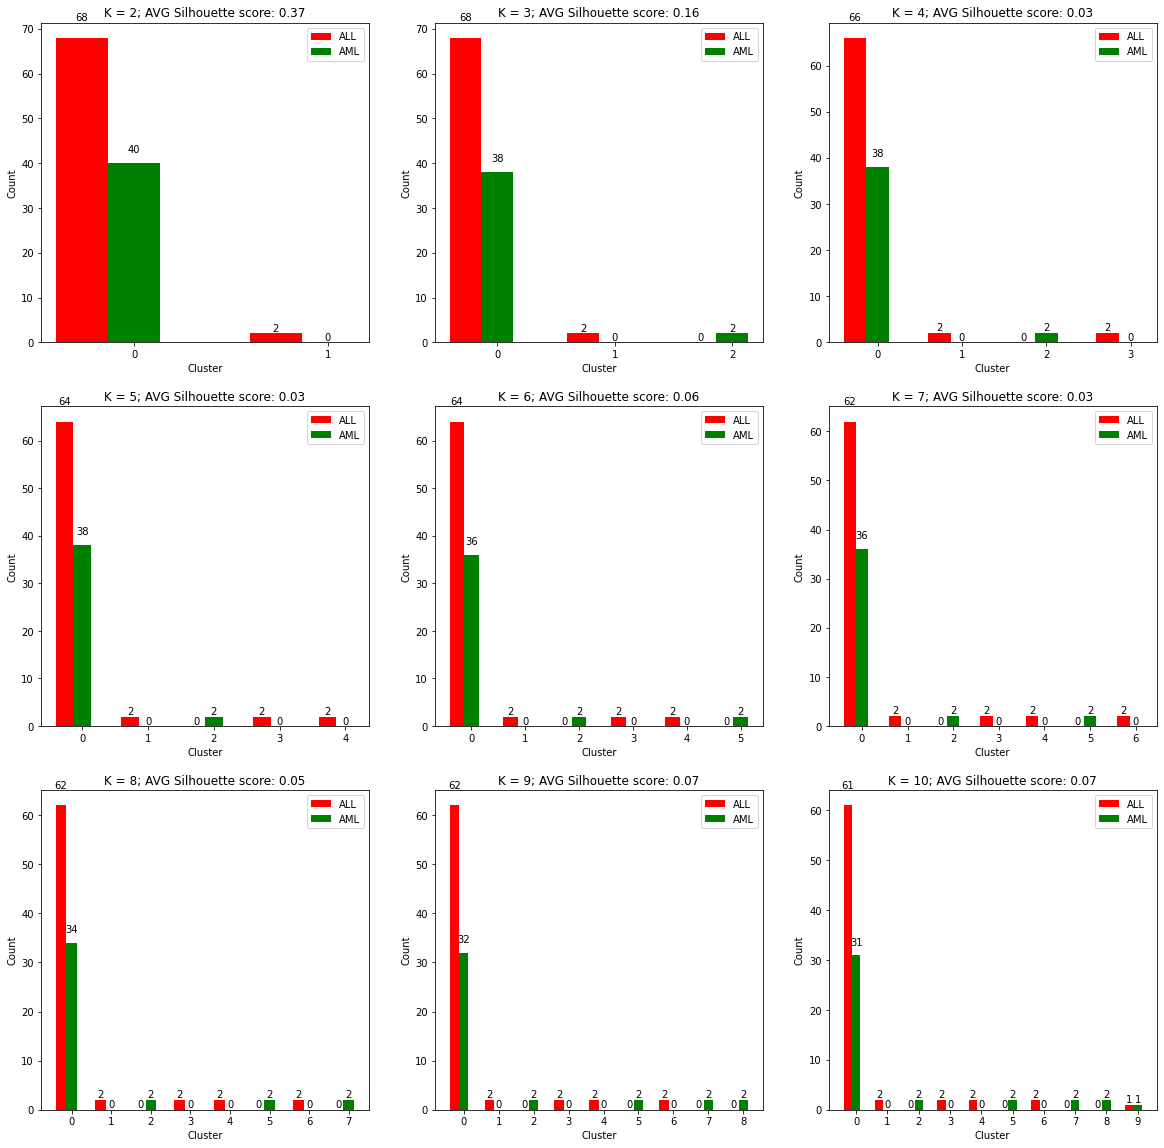

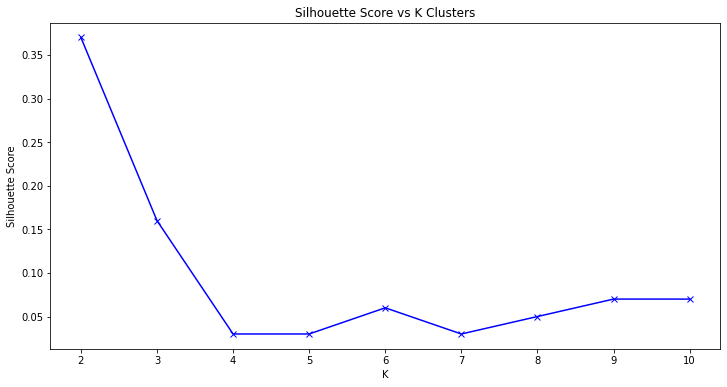

In [69]:
linkages = ["ward", "complete", "average", 'single']
all_hcavar_results = {}
for linkage in linkages:
    print(f"==============================================\nStarting analysis with linkage \"{linkage}\":\n\n")
    clusters_test = [2,3,4,5,6,7,8,9,10]
    df_hca_results , hca_output_vectors = hca_clustering(pd.DataFrame(X_variance), clusters_test, linkage)
    all_hcavar_results[linkage] = df_hca_results , hca_output_vectors
    silh_all = plot_results(clusters_test,df_hca_results,hca_output_vectors)
    plt.show()
    plot_silhouettescore(clusters_test, silh_all)
    plt.show()

The results are very similar with a **K=2** having the highest silhouette score for all. Most probably this happens because the linkage metrics are differentiating exactly the same clusters with only some small changes for higher values of K.

We decide to just plot the first and second linkage ("single", "complete") results to visualize what is happening.

Single Linkage:


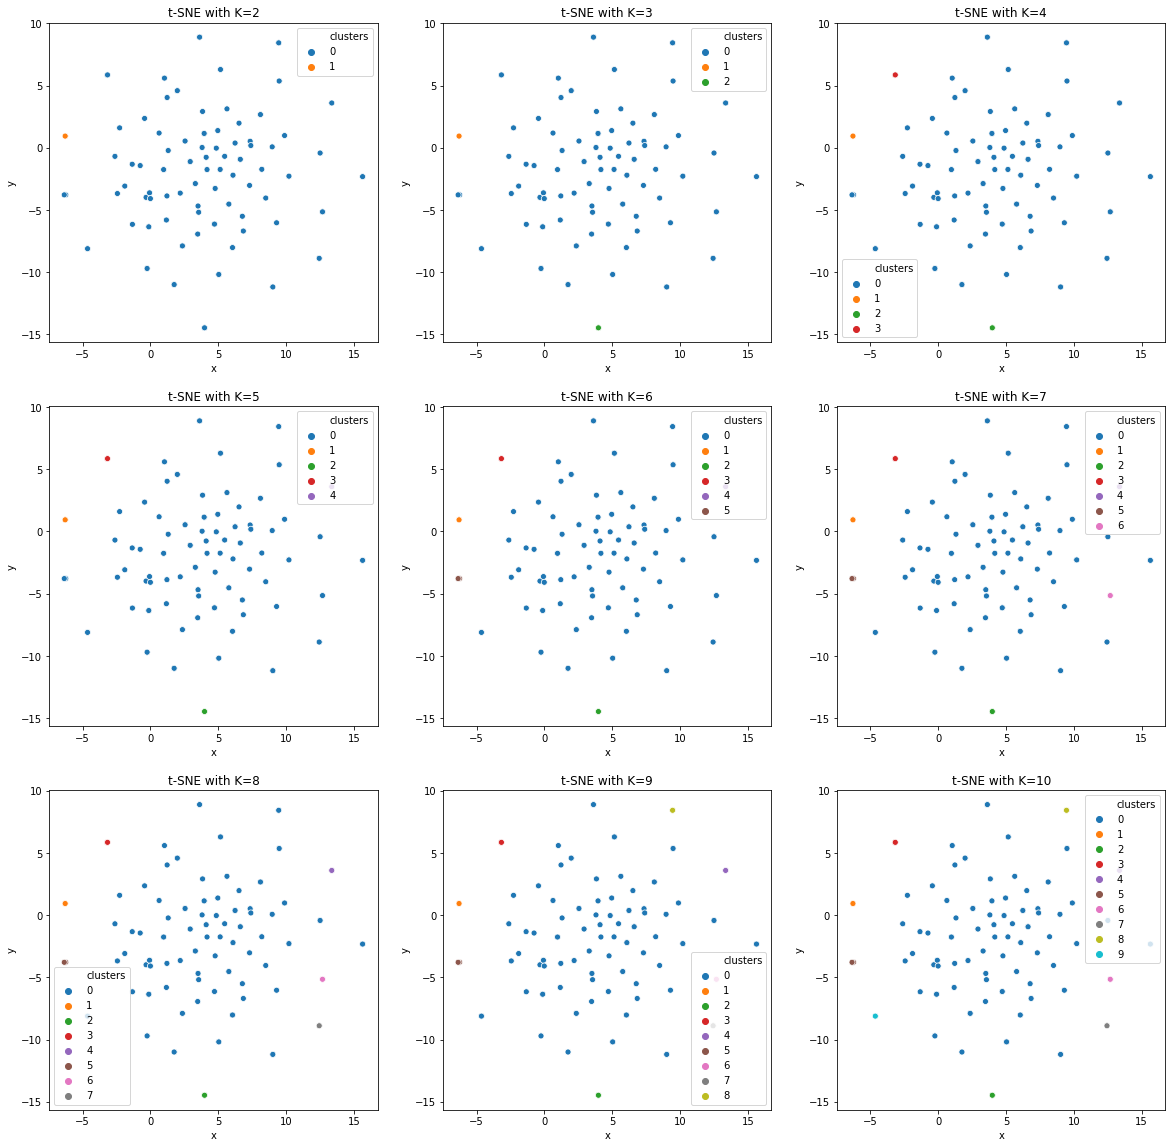

Complete Linkage:


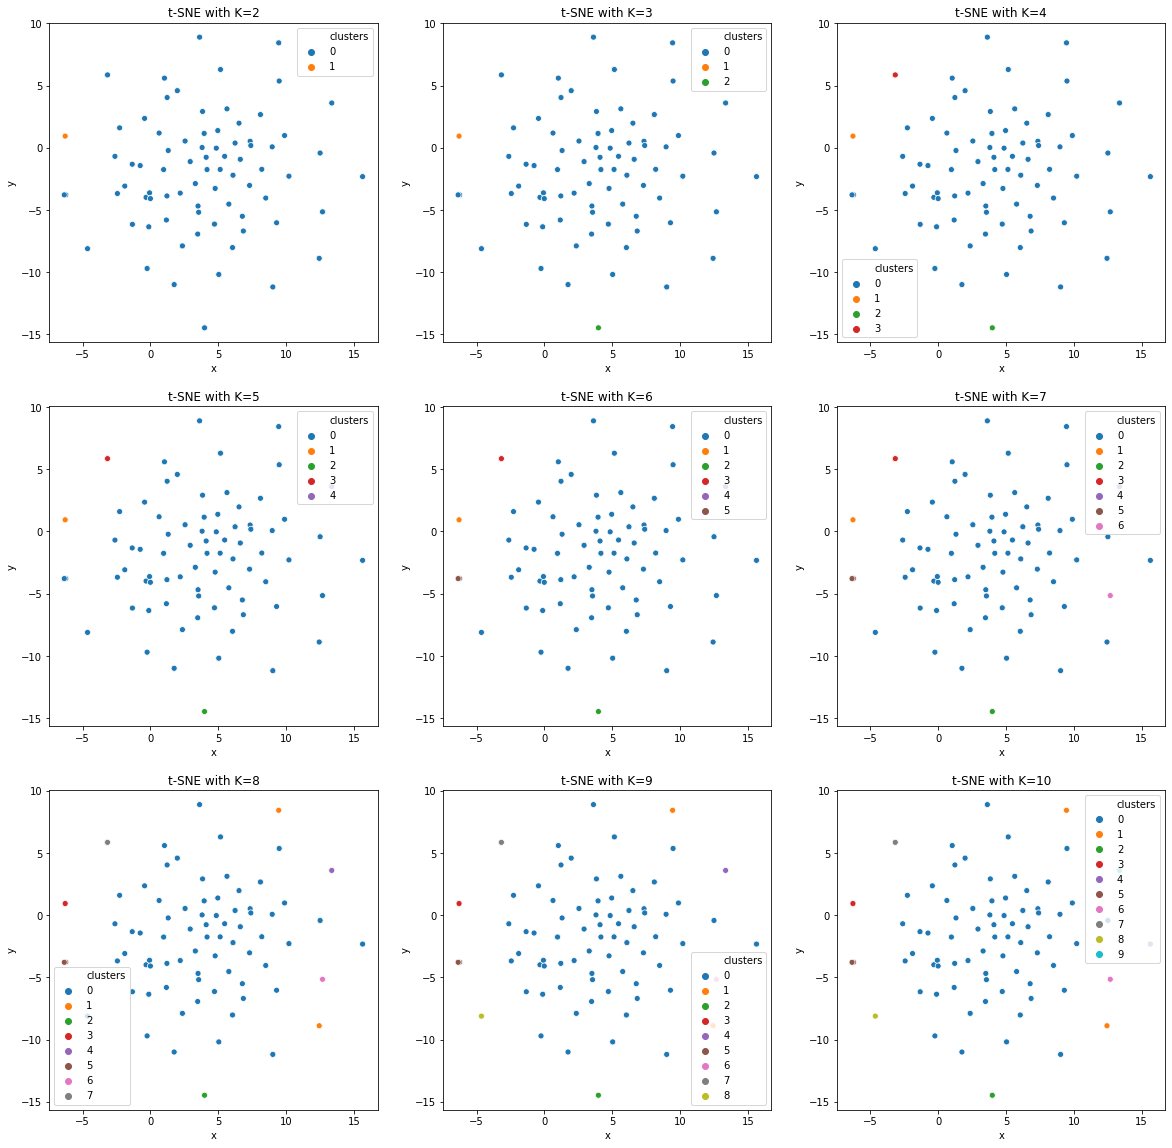

In [72]:
print("Single Linkage:")
plot_results_tsne(df_plot_var_xvar_tsne,all_hcavar_results['single'][1],clusters_test)
plt.show()
print("Complete Linkage:")
plot_results_tsne(df_plot_var_xvar_tsne,all_hcavar_results['complete'][1],clusters_test)
plt.show()

### 4.2 HCA using PCA Components

Same as before, in section 2.2 we chose to retain 30 components and here we now test the HCA clustering algorithm, with different values of K and linkage metrics, on this data.

Starting analysis with linkage ward:




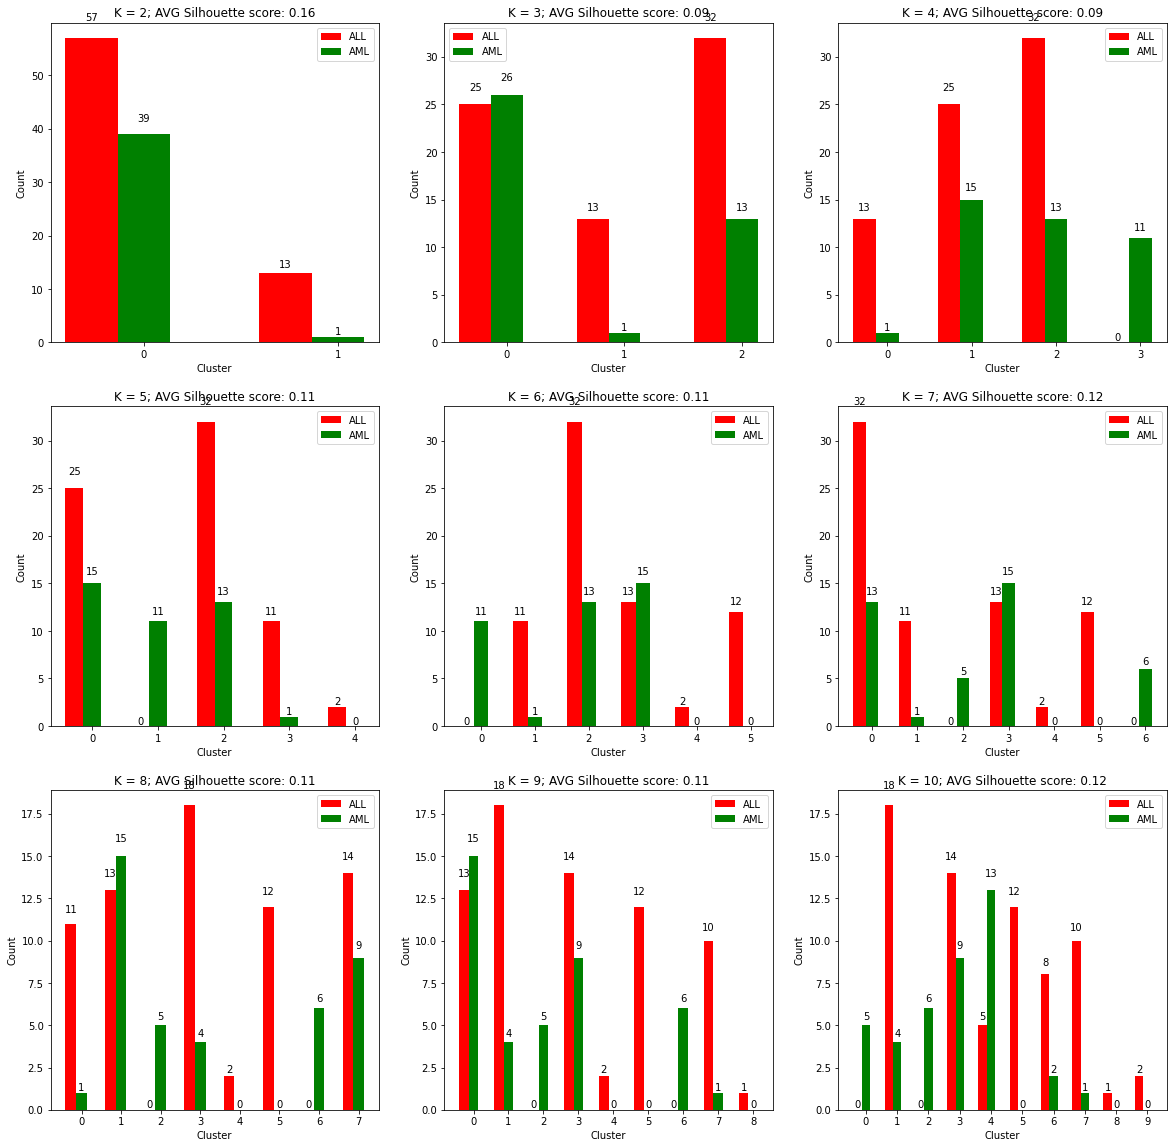

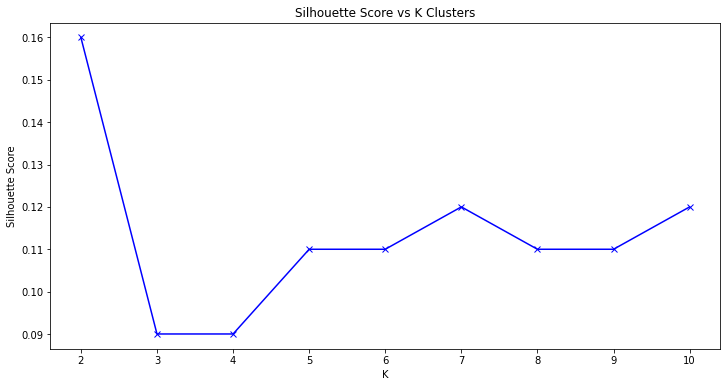

Starting analysis with linkage complete:




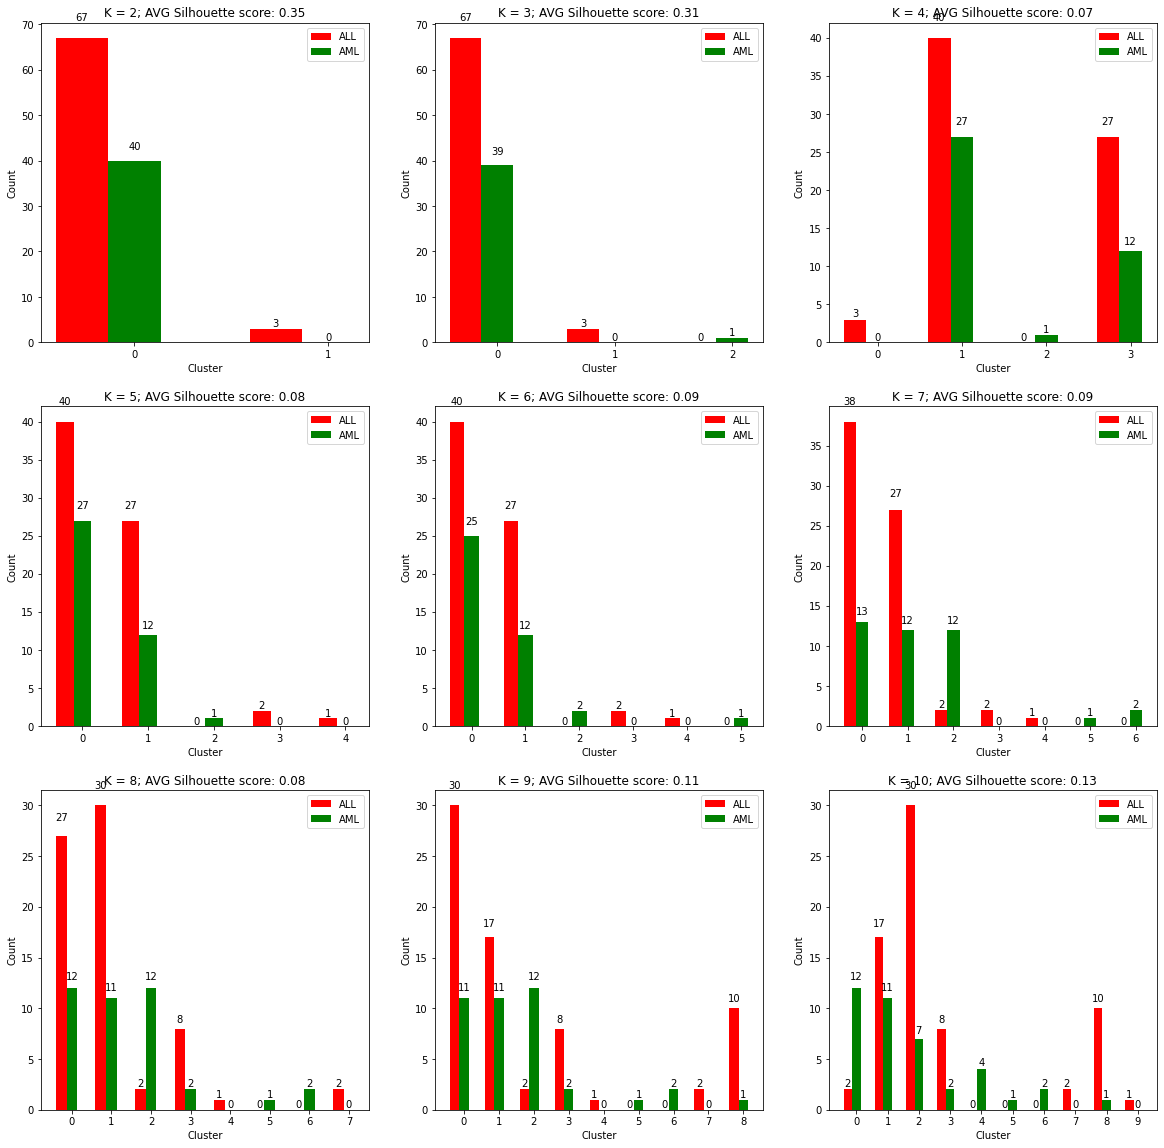

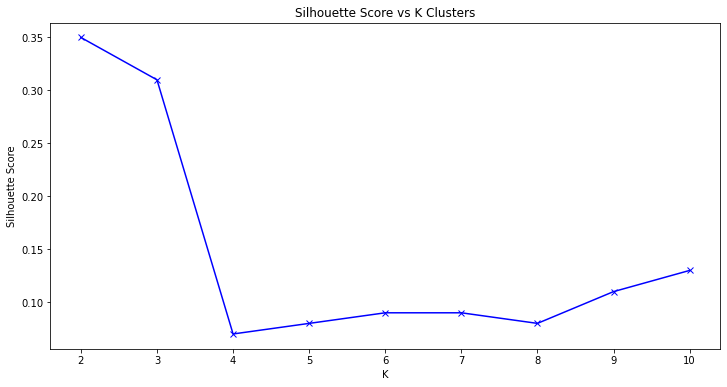

Starting analysis with linkage average:




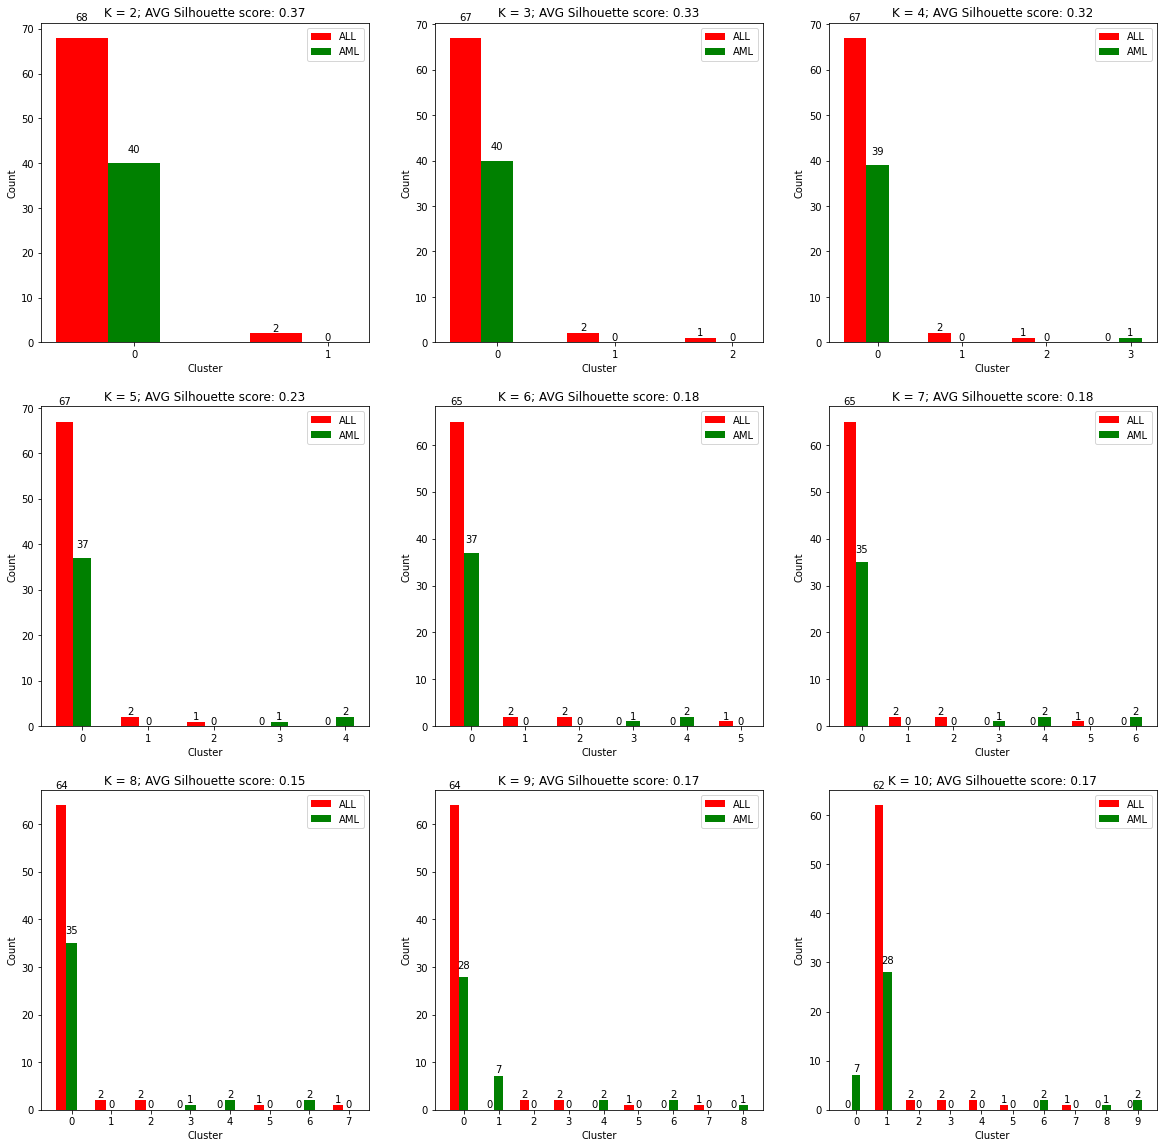

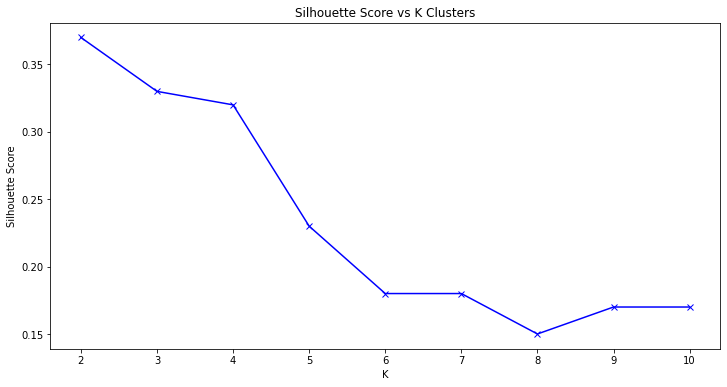

Starting analysis with linkage single:




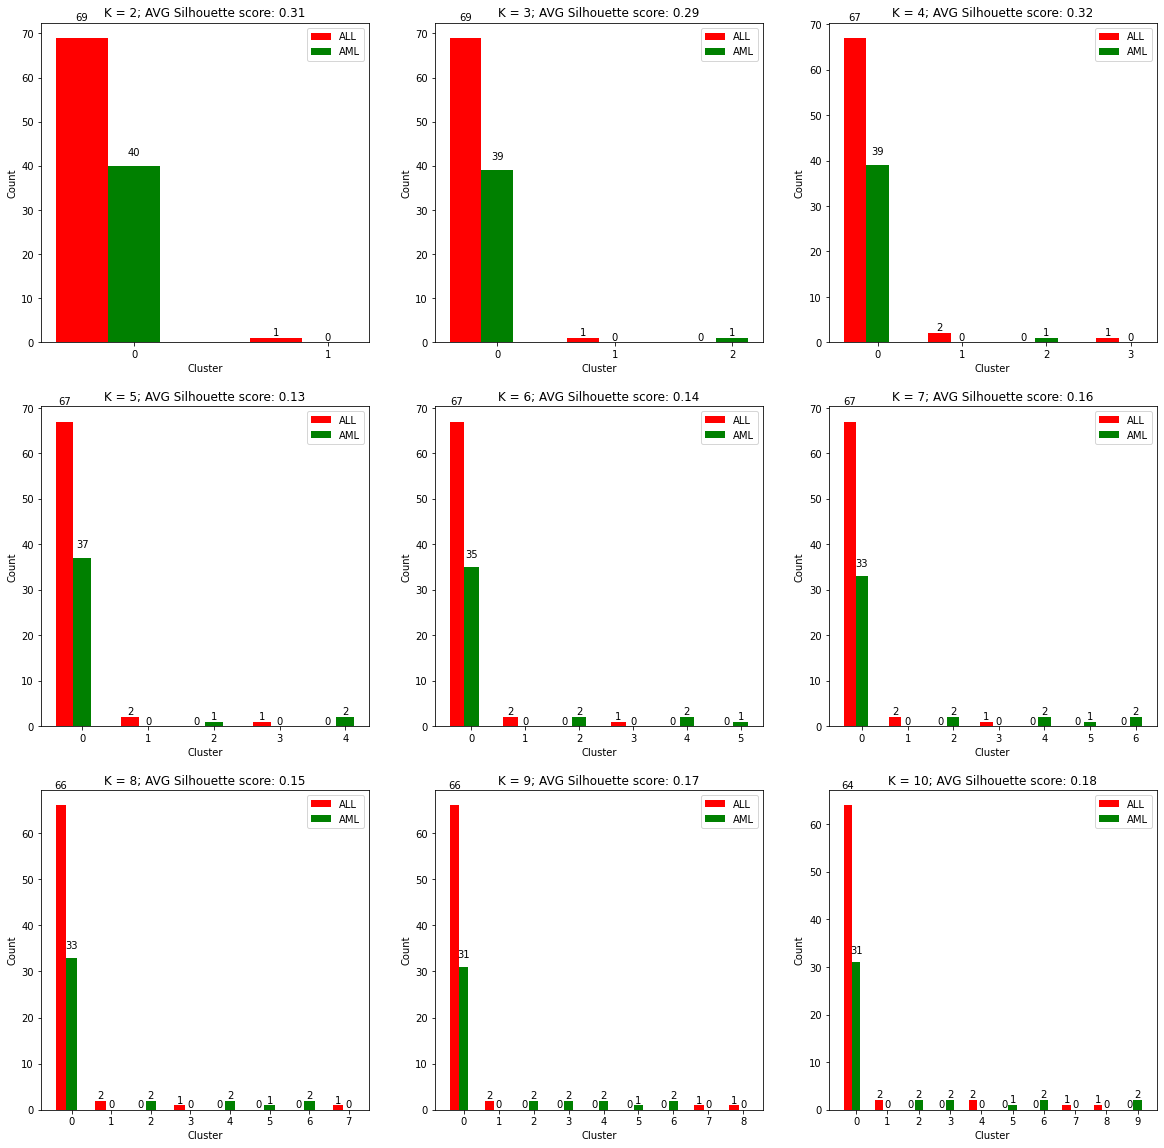

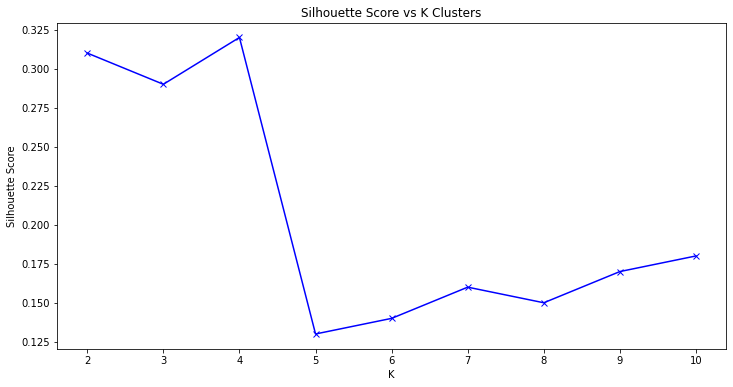

In [73]:
linkages = ["ward", "complete", "average","single"]
all_hcapca_results = {}
for linkage in linkages:
    print(f"==============================================\nStarting analysis with linkage {linkage}:\n\n")
    clusters_test = [2,3,4,5,6,7,8,9,10]
    df_hca_pca_results , hca_pca_output_vectors = hca_clustering(pd.DataFrame(X_PCA), clusters_test, linkage)
    all_hcapca_results[linkage] = df_hca_pca_results , hca_pca_output_vectors
    silh_all = plot_results(clusters_test,df_hca_pca_results,hca_pca_output_vectors)
    plt.show()
    plot_silhouettescore(clusters_test, silh_all)
    plt.show()

Using the PCA resulting components, we have the highest silhouette obtained by the linkage metric **average** and a **k=2**.

We visualize below the resulting clusters.

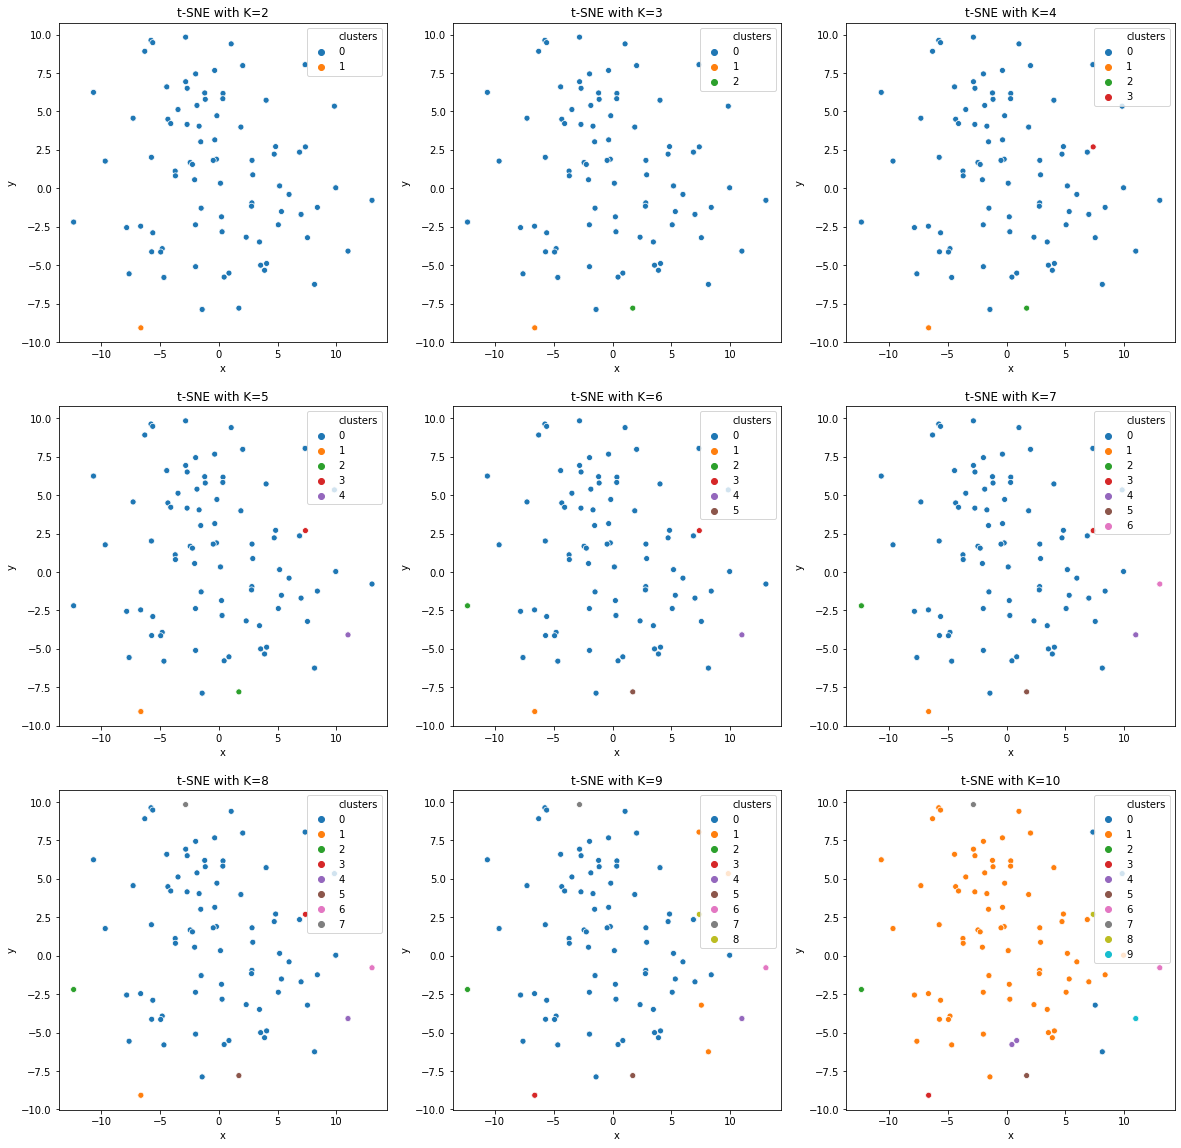

In [74]:
plot_results_tsne(df_plot_pca_xpca_tsne,all_hcapca_results['average'][1],clusters_test)

### 4.3 Conclusion

The outcomes are again not very gratifying. Even though we may have obtained a decent silhouette score, this is just possible due most probably by identifying outliers from the whole dataset. It is far from the results we would want when comparing with the ground truth.

Using the PCA components seem to provide bigger clusters, especially when using the "complete" and "warp" linkage metric. In this case we can observe again some clusters with a high percentage of a specific type (AML or ALL).

## 5. Evaluating Clustering Results

Here we compare the best results obtained using `K`-means and HCA 
1. **First without using ground truth**
2. **Second by using ground truth (`DIAGNOSIS`)**.

## 5.1. Without Using Ground Truth

We decided to test several metrics to understand how the data is analysed by each of them.

In [75]:
from sklearn import metrics

In [89]:
Results = {
    "KMeans with all features": kmeans_output_vectors,
    "KMeans with XVariance": kmeans_var_output_vectors,
    "KMeans with PCA": kmeans_pca_output_vectors,
    "HCA with XVariance": all_hcavar_results['single'][1],
    "HCA with PCA and Average Linkage": all_hcapca_results['average'][1],
    "HCA with PCA and Complete Linkage": all_hcapca_results['complete'][1],
}

### 5.1.1 Using Silhouette Score




One of the best result was with KMeans with XVariance and a K = 2
The Score was: 0.37


<BarContainer object of 54 artists>

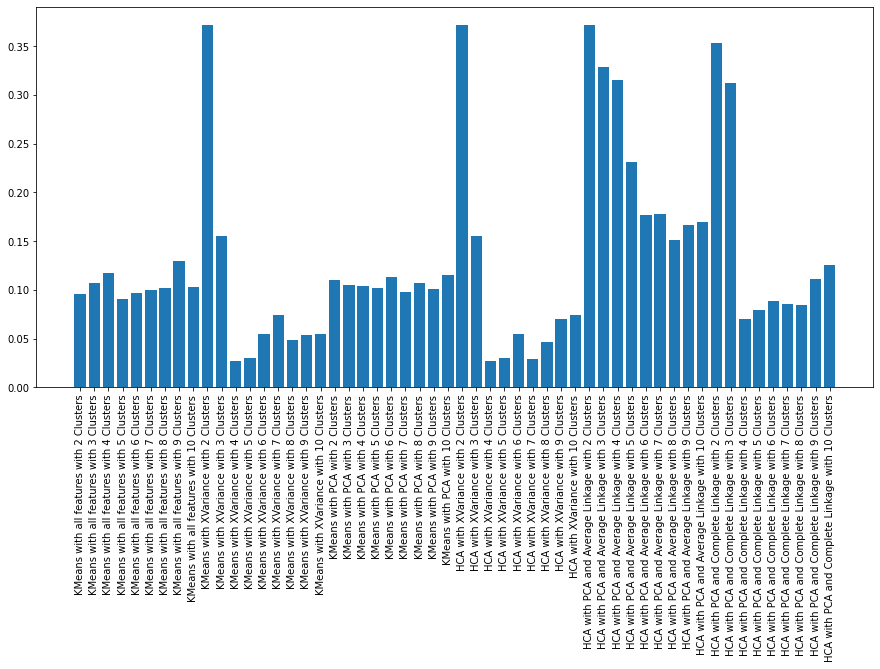

In [90]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}

all_scores = []
label = []

for result in Results:
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.silhouette_score(X, k_result['clusters'], random_state=42)
        all_scores.append(Score)
        label.append(f"{result} with {K} Clusters")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nOne of the best result was with {} and a K = {}\nThe Score was: {:.2}".format(best_results["Model"], best_results["K"], best_results["Score"]))

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

In the case of Silhouette score, when it is around zero, it indicates overlapping clusters.
The score will be higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

### Using 5.1.2 Calinski-Harabasz Index




One of the best results was with KMeans with all features and a K = 2
The Score was: 11.9


<BarContainer object of 54 artists>

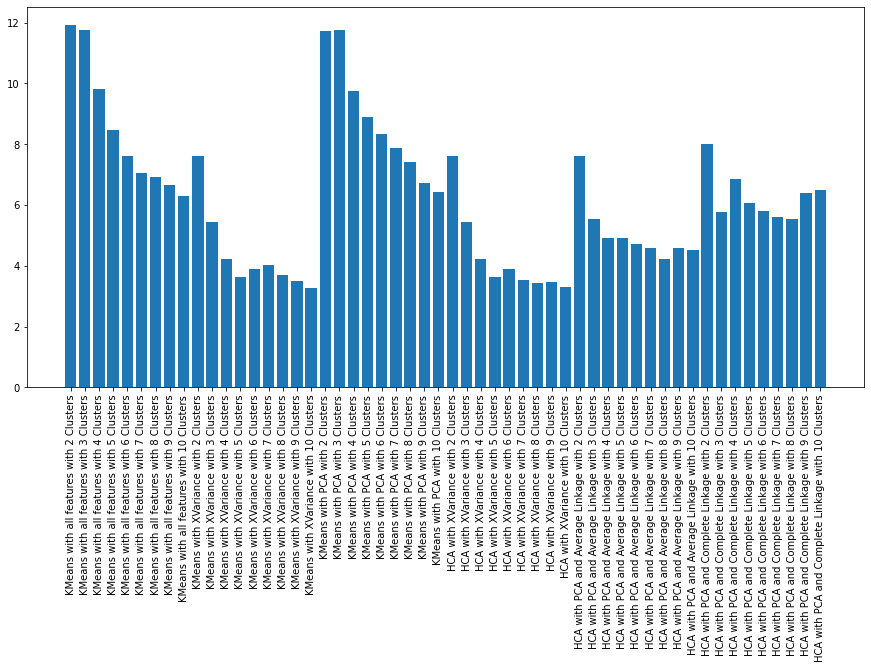

In [91]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}
all_scores = []
label = []

for result in Results:
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.calinski_harabasz_score(X, k_result['clusters'])
        all_scores.append(Score)
        label.append(f"{result} with {K} Clusters")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nOne of the best results was with {} and a K = {}\nThe Score was: {:.3}".format(best_results["Model"], best_results["K"], best_results["Score"]))

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

For the Calinski-Harabasz score, the value is higher when clusters are dense and well separated, which relates to a standard concept of a cluster. CH tends to prefer cluster solutions with clusters consisting of roughly the same number of objects. Again the higher the value the better.

Although the values don't seem to decrease so much after K=2 as it happened to the Silhouette score, they have a similar pattern.

### Using 5.1.3 Davies-Bouldin Index




One of the best results was with KMeans with XVariance and a K = 2
The Score was: 0.498


<BarContainer object of 54 artists>

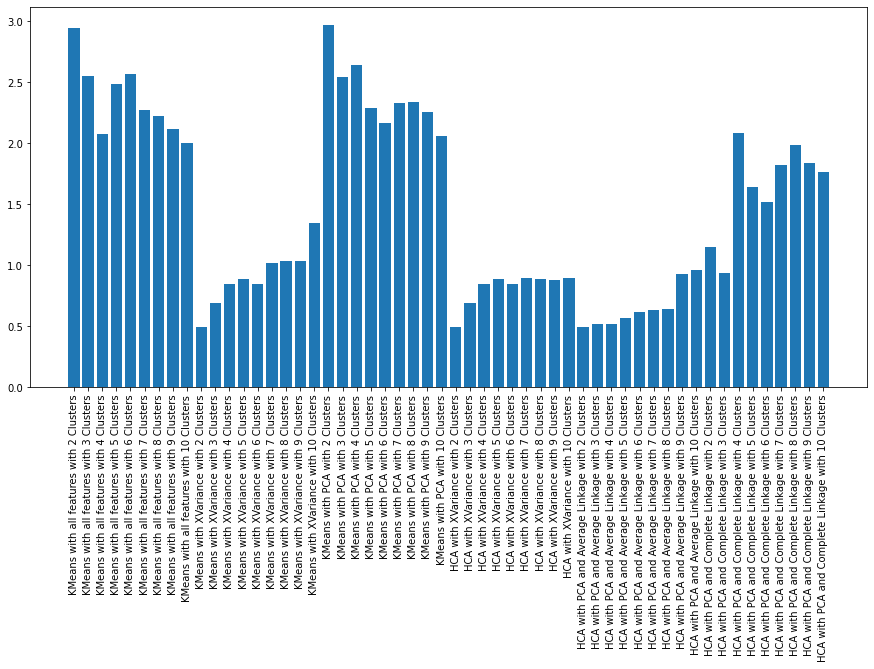

In [93]:
best_results = {
    "Score":float("inf"),
    "K":0,
    "Model":"",
}
all_scores = []
label = []
for result in Results:
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.davies_bouldin_score(X, k_result['clusters'])
        all_scores.append(Score)
        label.append(f"{result} with {K} Clusters")
        if Score < best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nOne of the best results was with {} and a K = {}\nThe Score was: {:.3}".format(best_results["Model"], best_results["K"], best_results["Score"]))

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

For this metric it is computed the average similarity measure of each cluster with its most similar cluster. Zero is the lowest possible score. Values closer to zero indicate a better partition.

For this example it seem to give a preference to using XVariance both with KMeans and HCA.

## 5.2. Using Ground Truth

Again we used several metrics to evaluate our results with the ground truth.

### 5.2.1 Adjusted Rand index




Best result was with KMeans with all features and a K = 8
The Score was: 0.216


<BarContainer object of 54 artists>

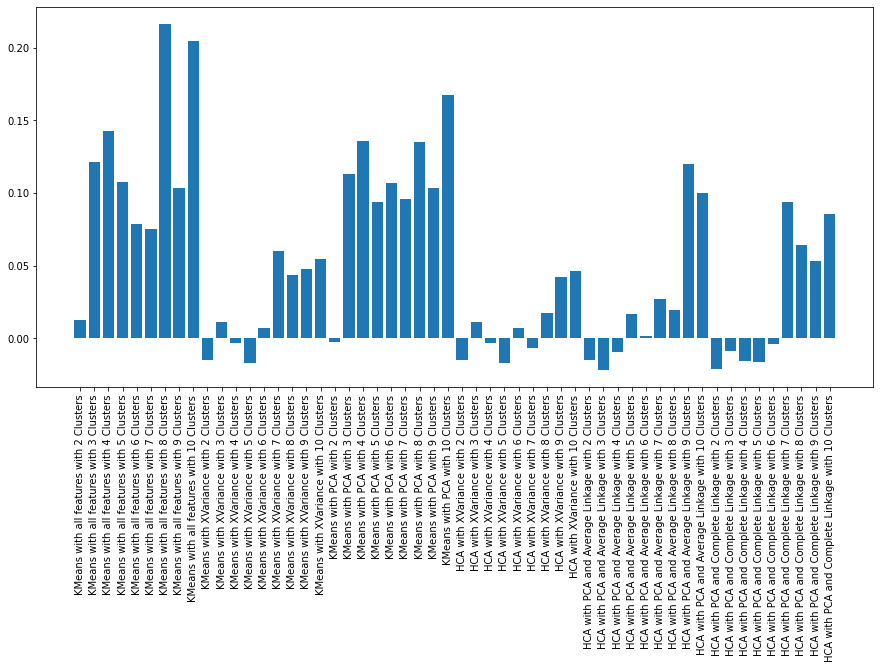

In [95]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}
all_scores = []
label = []
for result in Results:
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.adjusted_rand_score(y, k_result['clusters'])
        all_scores.append(Score)
        label.append(f"{result} with {K} Clusters")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Score was: {:.3}".format(best_results["Model"], best_results["K"], best_results["Score"]))

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

Adjusted Rand index is a function that measures the similarity, ignoring permutations and with chance normalization.
Many of its clusters have a high percentage of a specific type of patient.

### 5.2.2 V-Measure




Best result was with KMeans with all features and a K = 8
The Completeness Score was: 0.221
The Homogeneity Score was: 0.606


<BarContainer object of 54 artists>

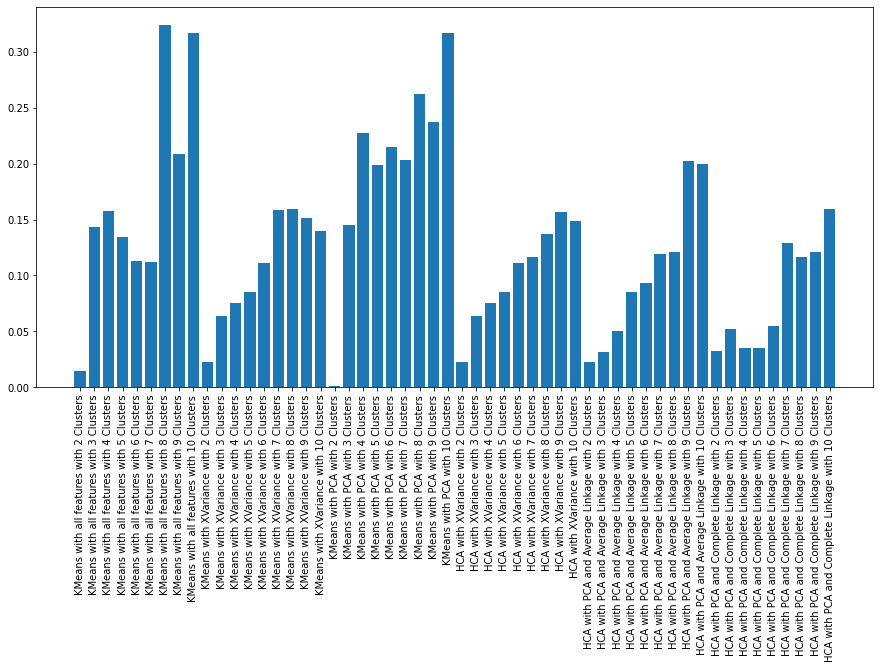

In [99]:
best_results = {
    "Completeness Score": 0,
    "Homogeneity Score": 0,
    "V-Measure Score": 0,
    "K":0,
    "Model":"",
}
all_scores = []
label = []
for result in Results:
    for k_result in Results[result]:
        K = k_result["k"]
        Score = metrics.v_measure_score(y, k_result['clusters']) # beta = 1.0
        all_scores.append(Score)
        label.append(f"{result} with {K} Clusters")
        if Score > best_results["V-Measure Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Completeness Score"] = metrics.completeness_score(y, k_result['clusters'])
            best_results["Homogeneity Score"] = metrics.homogeneity_score(y, k_result['clusters'])
            best_results["V-Measure Score"] = Score
print("\n\n==================\n\nBest result was with {} and a K = {}\nThe Completeness Score was: {:.3}\nThe Homogeneity Score was: {:.3}".format(
            best_results["Model"],
            best_results["K"],
            best_results["Completeness Score"],
            best_results["Homogeneity Score"]
        )
     )

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

* Homogeneity measures if each cluster contains only members of a single class.
* Completeness measures if all members of a given class are assigned to the same cluster.
* Their harmonic mean called V-measure is also computed.

Both Adjusted Rand Index and V-Measure give a preference for the use of **KMeans with all features with a K=8 and K=10 and KMeans with PCA features and a K=10**. The results can be seen below respectively for these Clusters.

<img src="figures/figure_1.png"><img src="figures/figure_2.png"><img src="figures/figure_3.png">

<img src="figures/figure_4.png"><img src="figures/figure_5.png"><img src="figures/figure_6.png">

As it was noted before, big clusters with a high percentage of a specific class seem to provide the best results to analyse further. Any of the ground truth metrics seems to be good to evaluate our clusters.

## 6. Clustering Patients using Density-based Clustering

Here we use DBSCAN to do another clustering analysis of our dataset.

In [100]:
from sklearn.cluster import DBSCAN

In [126]:
def dbscan_clustering(data, eps, min_sample):
    results_all = []
    indexes = []
    dbscan_output_vectors = []
    for i, c in enumerate(eps):
        data2 = data.copy()
        indexes.append(c)
        dbscan = DBSCAN(eps=c, min_samples=min_sample).fit(data2)
        data2['cluster'] = dbscan.labels_
        data2['target'] = y
        dbscan_output_vectors.append({'eps':c, 'clusters': data2['cluster']})
        clusters_uniques = np.unique(data2['cluster'])
        results = {}
        for c2 in clusters_uniques:
            all_len = len(data2[(data2['cluster']==c2)&(data2['target']=='ALL')])
            aml_len = len(data2[(data2['cluster']==c2)&(data2['target']=='AML')])
            results[c2] = {'ALL':all_len, 'AML':aml_len}
        results_all.append(results)
    return pd.DataFrame(results_all, index = indexes), dbscan_output_vectors

def plot_results_dbscan(eps, df_results, df_clusters_vectors):
    num_columns = 3
    num_rows = math.ceil((len(eps)/num_columns))
    f, axs = plt.subplots(nrows= num_rows, ncols = num_columns,figsize=(20,20))
    if len(eps) > num_columns: plots = np.concatenate(axs)
    else:plots = axs
    
    silh_all = []
    for i, e in enumerate(eps):
        df_results_e = get_results(df_results, e)
        silh = round(silhouette_score(X, next(item for item in df_clusters_vectors if item["eps"] == e)['clusters'], random_state=42),2)
        silh_all.append(silh)
        title = 'EPS = {:.2}; AVG Silhouette score: {}'.format(e, silh )
        plot_clusters_by_diagnosis(df_results_e,plots[i],title)
    return silh_all

### 6.1 DBSCAN with X Variance

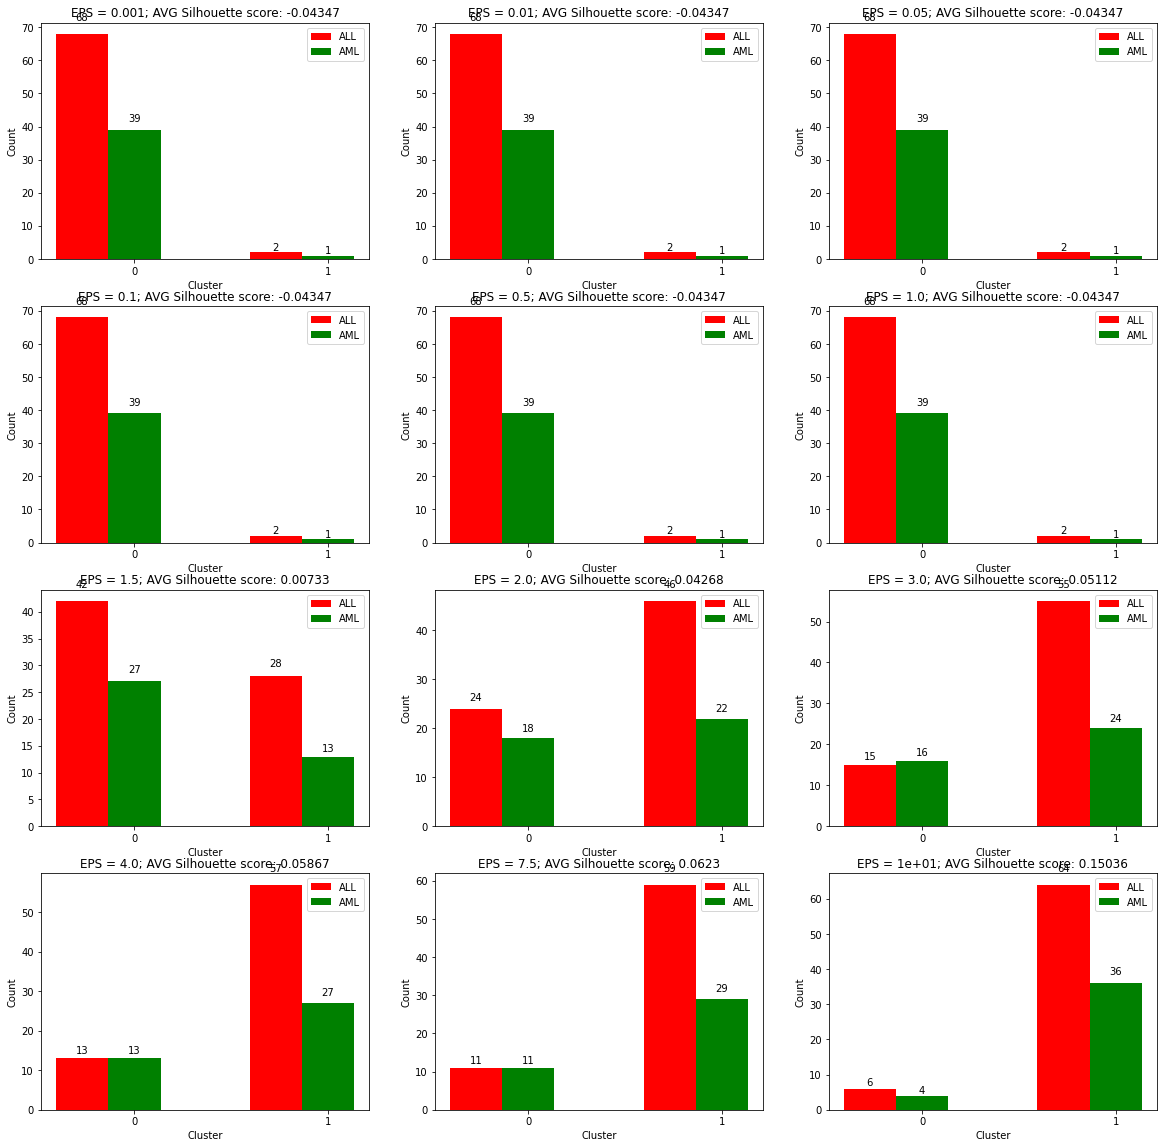

In [148]:
eps = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 7.5, 10.0]
df_dbscan_var_results , dbscan_output_var_vectors = dbscan_clustering(pd.DataFrame(X_variance), eps=eps, min_sample=3)
silh_all = plot_results_dbscan(eps,df_dbscan_var_results,dbscan_output_var_vectors)
plt.show()

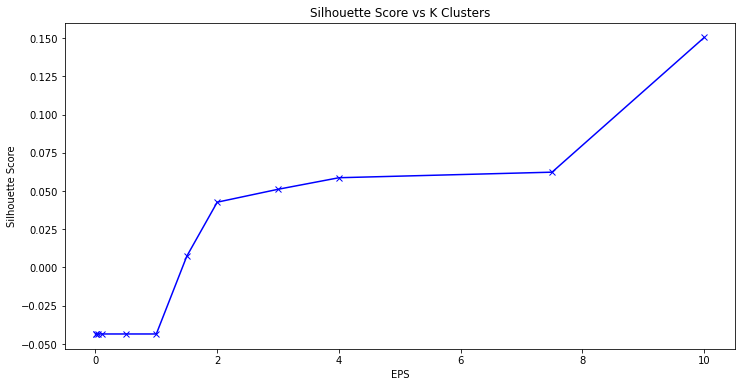

In [149]:
plot_silhouettescore(eps, silh_all, measure="EPS")

It seems that the higher the distance allowed between each pair of points within a cluster, the higher the silhouette score.

We are not allowed to keep increasing 'eps' since eventually we keep only one cluster which is meaningless for our project.

### 6.2 DBSCAN using PCA Components

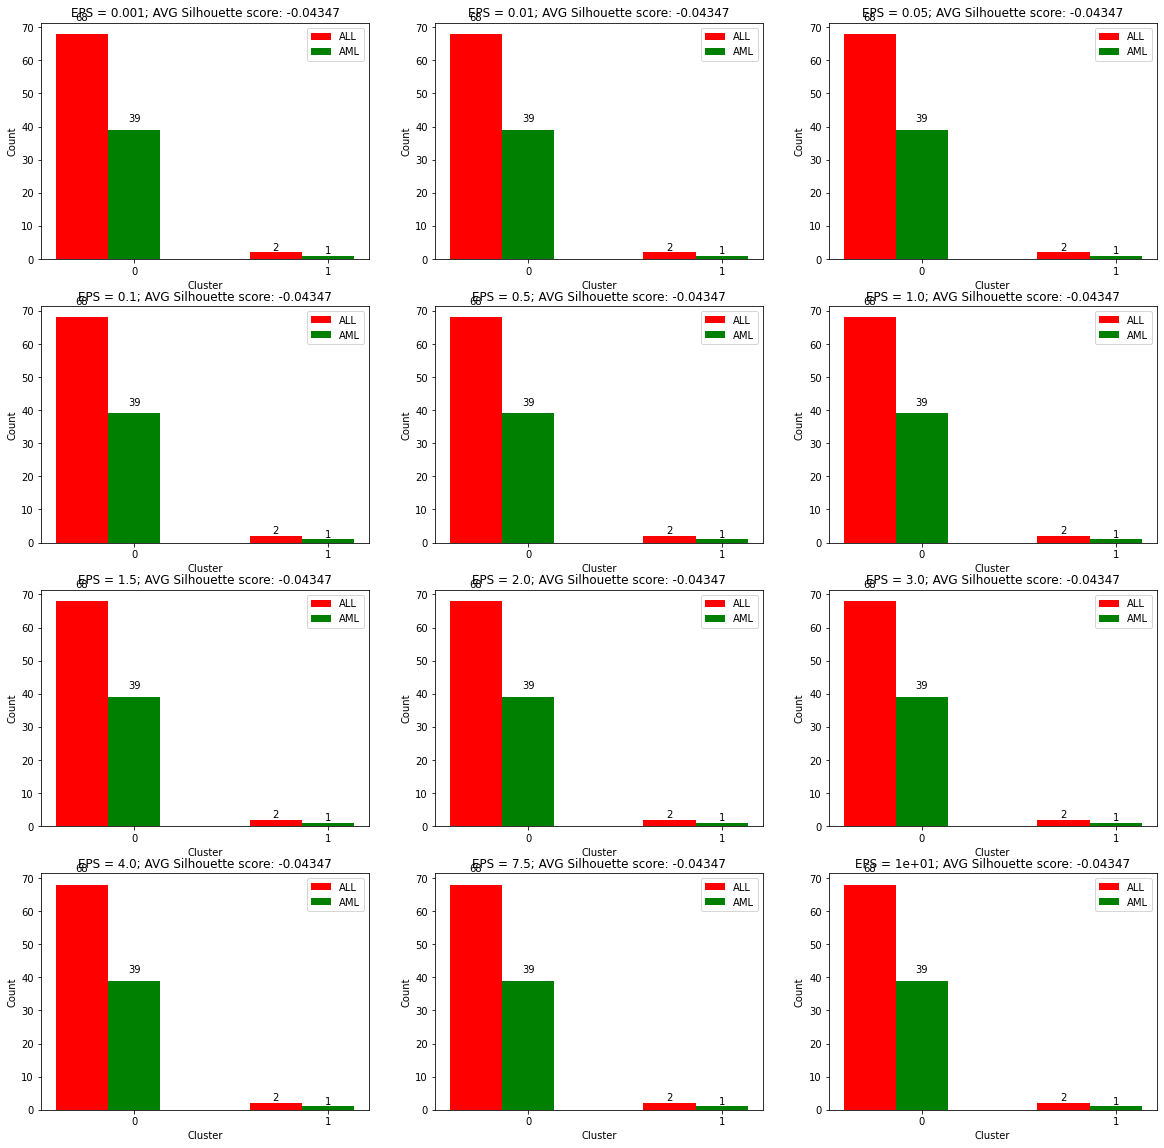

In [150]:
eps = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 7.5, 10.0]
df_dbscan_pca_results , dbscan_output_pca_vectors = dbscan_clustering(pd.DataFrame(X_PCA), eps=eps, min_sample=3)
silh_all = plot_results_dbscan(eps,df_dbscan_pca_results,dbscan_output_pca_vectors)
plt.show()

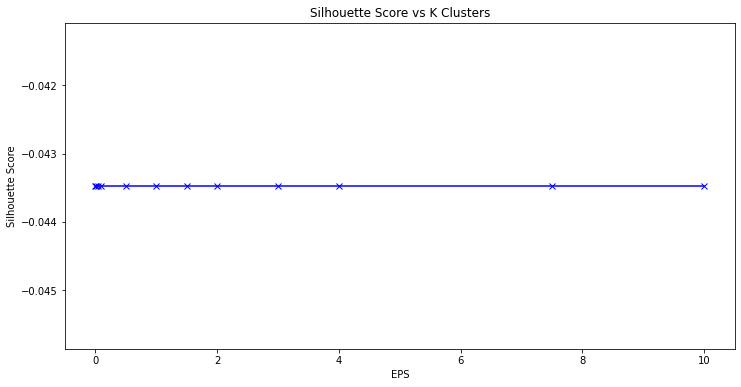

In [151]:
plot_silhouettescore(eps, silh_all, measure="EPS")

No difference is observed if we change the distance allowed between the clusters. This leads us to conclude that we have 3 points that are very different from the rest considering PCA components.

### 6.3 Metric measuring

#### 6.3.1 Silhouette Score

In [158]:
Results = {
    "DBSCAN with XVariance": dbscan_output_var_vectors,
    "DBSCAN with XPCA": dbscan_output_pca_vectors,
}




One of the best result was with DBSCAN with XVariance and a EPS = 10.0
The Score was: 0.15


<BarContainer object of 24 artists>

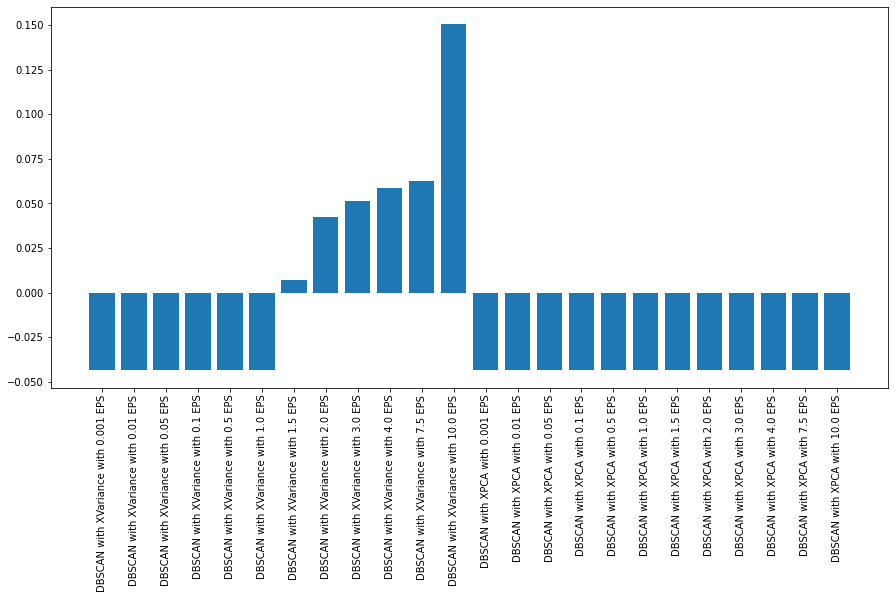

In [159]:
best_results = {
    "Score":0,
    "K":0,
    "Model":"",
}

all_scores = []
label = []

for result in Results:
    for k_result in Results[result]:
        K = k_result["eps"]
        Score = metrics.silhouette_score(X, k_result['clusters'], random_state=42)
        all_scores.append(Score)
        label.append(f"{result} with {K} EPS")
        if Score > best_results["Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Score"] = Score
print("\n\n==================\n\nOne of the best result was with {} and a EPS = {}\nThe Score was: {:.2}".format(best_results["Model"], best_results["K"], best_results["Score"]))

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

#### 6.3.2 V-Measure




Best result was with DBSCAN with XVariance and a eps = 3.0
The Completeness Score was: 0.0324
The Homogeneity Score was: 0.0294


<BarContainer object of 24 artists>

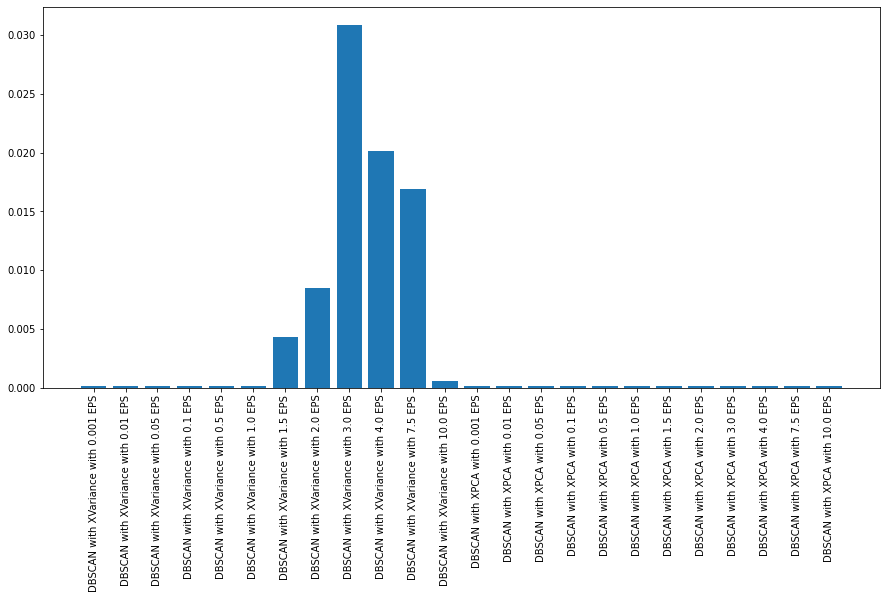

In [160]:
best_results = {
    "Completeness Score": 0,
    "Homogeneity Score": 0,
    "V-Measure Score": 0,
    "K":0,
    "Model":"",
}
all_scores = []
label = []
for result in Results:
    for k_result in Results[result]:
        K = k_result["eps"]
        Score = metrics.v_measure_score(y, k_result['clusters']) # beta = 1.0
        all_scores.append(Score)
        label.append(f"{result} with {K} EPS")
        if Score > best_results["V-Measure Score"]:
            best_results["K"] = K
            best_results["Model"] = result
            best_results["Completeness Score"] = metrics.completeness_score(y, k_result['clusters'])
            best_results["Homogeneity Score"] = metrics.homogeneity_score(y, k_result['clusters'])
            best_results["V-Measure Score"] = Score
print("\n\n==================\n\nBest result was with {} and a eps = {}\nThe Completeness Score was: {:.3}\nThe Homogeneity Score was: {:.3}".format(
            best_results["Model"],
            best_results["K"],
            best_results["Completeness Score"],
            best_results["Homogeneity Score"]
        )
     )

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.bar(label, all_scores)

### 6.4 Conclusions

The results from DBSCAN were not so good. The clustering obtained with PCA components had a negative score for silhouette which generally indicates that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Even though we can notice a better result for  BSCAN with XVariance and an EPS=3.0, the resulting V-Measure is still very low in comparison with other results obtained with KMeans.

**References**

[1] Jiawei Han, Micheline Kamber, and Jian Pei. 2011. Data Mining: Concepts and Techniques (3rd. ed.). Morgan Kaufmann Publishers Inc., San Francisco, CA, USA.